# 자전거 파일 분석 : 

서울특별시 공공자전거 대여이력 정보 2019년 6월

서울특별시 공공자전거 대여정보_201906_1.csv

서울특별시 공공자전거 대여정보_201906_2.csv

서울특별시 공공자전거 대여정보_201906_3.csv

# 1. 라이브러리 임포트 & 데이터 로드

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [2]:
# 한글 폰트를 위한 라이브러리를 임포트하고 해당 변수를 설정한다.

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
#  2019년 6월 3개로 나누어진 raw data로 읽어 들이고 연결한다. 

bikes_1 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_1.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bikes_2 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_2.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])
bikes_3 = pd.read_csv('./data/서울특별시 공공자전거 대여정보_201906_3.csv', \
                    encoding = 'cp949', parse_dates=['대여일시','반납일시'])

In [4]:
bike_ride = pd.concat([bikes_1, bikes_2, bikes_3], axis = 'index', ignore_index = True)

bike_ride.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-22040 2019-06-03 08:49:27       646  장한평역 1번출구 (국민은행앞)      1   
1  SPB-07446 2019-06-03 08:33:22       526           용답토속공원 앞      8   
2  SPB-20387 2019-06-05 08:27:47       646  장한평역 1번출구 (국민은행앞)      1   
3  SPB-16794 2019-06-05 08:46:29       646  장한평역 1번출구 (국민은행앞)      6   
4  SPB-18266 2019-06-10 08:27:26       529       장한평역 8번 출구 앞     10   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간    이용거리  
0 2019-06-03 09:17:10        3   중랑센터     14    27 1330.00  
1 2019-06-03 09:27:16        3   중랑센터     14    54 1180.00  
2 2019-06-05 08:41:31        3   중랑센터      2    12 1930.00  
3 2019-06-05 08:53:10        3   중랑센터     14     6 1340.00  
4 2019-06-10 08:33:40        3   중랑센터      2     5 1230.00

## 2. 데이터분석

## 2-1. 기초 데이터분석

In [5]:
bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215632 entries, 0 to 2215631
Data columns (total 11 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
dtypes: datetime64[ns](2), float64(1), int64(5), object(3)
memory usage: 185.9+ MB


In [6]:
# 평균 이용시간 27분, 중위수는 17분,  평균 이용거리 3912m,  중위수는 2270m

bike_ride.describe(percentiles = [.25, .5, .75,.90, .95,.99])

대여 대여소번호      대여거치대    반납대여소번호      반납거치대       이용시간       이용거리
count 2215632.00 2215632.00 2215632.00 2215632.00 2215632.00 2215632.00
mean     1226.15       7.01    1228.35       6.97      27.17    3912.92
std       849.92       5.24     846.23       5.24      29.08    5145.47
min         3.00       1.00       3.00       1.00       1.00       0.00
25%       505.00       3.00     512.00       3.00       8.00    1220.00
50%      1159.00       6.00    1159.00       6.00      17.00    2270.00
75%      1846.00      10.00    1839.00      10.00      37.00    4670.00
90%      2312.00      14.00    2306.00      14.00      62.00    8920.00
95%      2617.00      17.00    2618.00      17.00      89.00   12550.00
99%      3533.00      24.00    3533.00      24.00     121.00   22400.00
max      9998.00      40.00    9998.00      40.00    3133.00  232310.00

In [7]:
# 1543개 대여소,   자전거는 19029 대 관리 됨. 
bike_ride.describe(include = ['object',np.datetime64])

자전거번호                 대여일시        대여 대여소명                 반납일시  \
count     2215632              2215632        2215632              2215632   
unique      19029              1317207           1543              1321020   
top     SPB-17237  2019-06-05 18:06:56  뚝섬유원지역 1번출구 앞  2019-06-13 08:31:30   
freq          292                   13          12617                   18   
first         NaN  2019-06-01 00:00:02            NaN  2019-06-01 00:02:51   
last          NaN  2019-06-30 23:59:56            NaN  2019-07-03 03:09:28   

               반납대여소명  
count         2215632  
unique           1543  
top     뚝섬유원지역 1번출구 앞  
freq            14019  
first             NaN  
last              NaN

In [8]:
# 누락값 없음
bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
dtype: int64

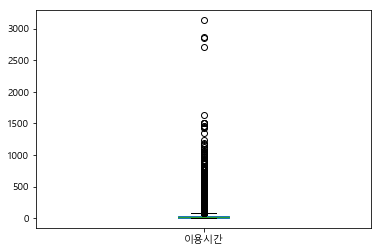

In [9]:
# 이용시간 분포
bike_ride['이용시간'].plot(kind = 'box');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6641: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


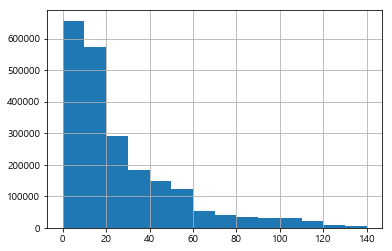

In [10]:
# 이용시간 데이터분포를 알아본다.

bike_ride['이용시간'].hist(bins = [0,10,20,30,40,50,60,70,80,90,
                               100,110,120,130,140,np.inf]);

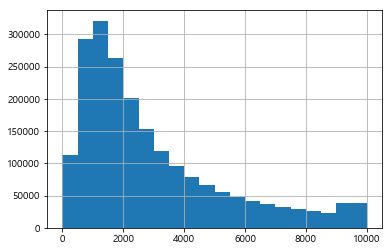

In [11]:
# 이용거리 데이터분포를 알아본다.

bike_ride['이용거리'].hist(bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,
                               5500,6000,6500,7000,7500,8000,8500,9000,10000,np.inf]);

## 2-2. 분석에 필요한 컬럼과 데이터프레임 생성

In [12]:
# 일자 비교를 위해서 요일 컬럼 추가
dayofweek = ['월','화','수','목','금','토','일']
bike_ride['요일'] = bike_ride['대여일시'].dt.dayofweek.apply(lambda x: dayofweek[x])


# 주중/주말공휴일 구분
bike_ride['주말구분'] = bike_ride['요일'].apply(\
                                lambda x: '평일' if x not in (['토', '일']) else '주말')

# 일자 컬럼 추가
bike_ride['일자'] = bike_ride['대여일시'].dt.day

# 시간대 컬럼 추가
bike_ride['대여시간대'] =bike_ride['대여일시'].dt.hour
bike_ride['반납시간대'] =  bike_ride['반납일시'].dt.hour

bike_ride.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-22040 2019-06-03 08:49:27       646  장한평역 1번출구 (국민은행앞)      1   
1  SPB-07446 2019-06-03 08:33:22       526           용답토속공원 앞      8   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간    이용거리 요일 주말구분  일자  대여시간대  \
0 2019-06-03 09:17:10        3   중랑센터     14    27 1330.00  월   평일   3      8   
1 2019-06-03 09:27:16        3   중랑센터     14    54 1180.00  월   평일   3      8   

   반납시간대  
0      9  
1      9

In [13]:
# 대여소들이 위치한 행정구역상 구를 알아내기 위해서 2019년 공공자전거 이용정보 파일을 
# 읽어들이고 데이터프레임의 첫부분을 살펴본다.

bike_shop = pd.read_excel('./data/공공자전거 대여소 정보_201905.xlsx')
bike_gu = bike_shop[['구분', '대여소번호', '대여소명', '위도', '경도']]
bike_gu.head(1)

구분  대여소번호              대여소명    위도     경도
0  마포구    101  101. (구)합정동 주민센터 37.55 126.91

In [14]:
# 대여 대여소번호를 사용하여 대여 대여소가 있는 대여구 대여구위도와 대여구경도 컬럼을 만든다.

bike_ride = bike_ride.merge(bike_gu, left_on='대여 대여소번호', right_on='대여소번호')
bike_ride.drop(['대여소번호', '대여소명'], axis=1, inplace=True)
bike_ride.rename(columns={'구분' : '대여구',\
                          '위도' : '대여점위도', \
                          '경도' : '대여점경도'}, \
                 inplace=True)
bike_ride.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-22040 2019-06-03 08:49:27       646  장한평역 1번출구 (국민은행앞)      1   
1  SPB-20387 2019-06-05 08:27:47       646  장한평역 1번출구 (국민은행앞)      1   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간    이용거리 요일 주말구분  일자  대여시간대  \
0 2019-06-03 09:17:10        3   중랑센터     14    27 1330.00  월   평일   3      8   
1 2019-06-05 08:41:31        3   중랑센터      2    12 1930.00  수   평일   5      8   

   반납시간대   대여구  대여점위도  대여점경도  
0      9  동대문구  37.56 127.06  
1      8  동대문구  37.56 127.06

In [15]:
# 반납 대여소번호를 사용하여 반납구, 반납구위도, 반납구경도 컬럼을 만든다.

bike_ride = bike_ride.merge(bike_gu, left_on='반납대여소번호', right_on='대여소번호')
bike_ride.drop(['대여소번호', '대여소명'], axis=1, inplace=True)
bike_ride.rename(columns={'구분' : '반납구',\
                          '위도' : '반납점위도', \
                          '경도' : '반납점경도'}, \
                 inplace=True)
#bike_ride.rename(columns={'구분' : '반납구'}, inplace=True)
bike_ride.head(2)

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-10280 2019-06-11 22:32:13       646  장한평역 1번출구 (국민은행앞)      5   
1  SPB-03173 2019-06-01 21:59:54       911    은평평화공원(역촌역4번출구)      1   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간  ...  주말구분  일자 대여시간대  \
0 2019-06-12 00:31:58      131   증산2교     18   119  ...    평일  11    22   
1 2019-06-01 22:15:14      131   증산2교      7    15  ...    주말   1    21   

   반납시간대   대여구  대여점위도  대여점경도   반납구  반납점위도  반납점경도  
0      0  동대문구  37.56 127.06  서대문구  37.58 126.91  
1     22   은평구  37.61 126.92  서대문구  37.58 126.91  

[2 rows x 22 columns]

In [16]:
# 대여소와 반납소가 일치하는 데이터프레임을 만든다.

bike_same_df = bike_ride[bike_ride['대여 대여소번호'] == bike_ride['반납대여소번호']]
bike_same_df.head()

자전거번호                대여일시  대여 대여소번호 대여 대여소명  대여거치대  \
1914  SPB-13395 2019-06-01 00:33:23       131    증산2교      5   
1915  SPB-03546 2019-06-01 06:13:32       131    증산2교     20   
1916  SPB-22999 2019-06-01 07:31:03       131    증산2교     18   
1917  SPB-21520 2019-06-01 14:03:22       131    증산2교      8   
1918  SPB-03809 2019-06-01 14:09:15       131    증산2교      7   

                    반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간  ...  주말구분 일자 대여시간대  \
1914 2019-06-01 01:21:05      131   증산2교      5    47  ...    주말  1     0   
1915 2019-06-01 06:57:05      131   증산2교     19    43  ...    주말  1     6   
1916 2019-06-01 09:05:00      131   증산2교     18    86  ...    주말  1     7   
1917 2019-06-01 15:05:06      131   증산2교      8    58  ...    주말  1    14   
1918 2019-06-01 15:05:14      131   증산2교      7    55  ...    주말  1    14   

      반납시간대   대여구  대여점위도  대여점경도   반납구  반납점위도  반납점경도  
1914      1  서대문구  37.58 126.91  서대문구  37.58 126.91  
1915      6  서대문구  37.58 126.91  서대문구  37.58 126.91  
1916      9  서대문구  37.58 126.91  서대문구  37.58 126.91  
1917     15  서대문구  37.58 126.91  서대문구  37.58 126.91  
1918     15  서대문구  37.58 126.91  서대문구  37.58 126.91  

[5 rows x 22 columns]

In [17]:
# 대여소와 반납소가 일치하지 않는 데이터프레임을 만든다.

bike_diff_df = bike_ride[bike_ride['대여 대여소번호'] != bike_ride['반납대여소번호']]
bike_diff_df.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-10280 2019-06-11 22:32:13       646  장한평역 1번출구 (국민은행앞)      5   
1  SPB-03173 2019-06-01 21:59:54       911    은평평화공원(역촌역4번출구)      1   
2  SPB-16754 2019-06-02 18:27:08       911    은평평화공원(역촌역4번출구)      5   
3  SPB-12181 2019-06-05 20:34:53       911    은평평화공원(역촌역4번출구)      1   
4  SPB-15416 2019-06-08 18:10:33       911    은평평화공원(역촌역4번출구)      3   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간  ...  주말구분  일자 대여시간대  \
0 2019-06-12 00:31:58      131   증산2교     18   119  ...    평일  11    22   
1 2019-06-01 22:15:14      131   증산2교      7    15  ...    주말   1    21   
2 2019-06-02 18:39:57      131   증산2교     16    12  ...    주말   2    18   
3 2019-06-05 20:51:01      131   증산2교     13    16  ...    평일   5    20   
4 2019-06-08 18:35:44      131   증산2교     13    24  ...    주말   8    18   

   반납시간대   대여구  대여점위도  대여점경도   반납구  반납점위도  반납점경도  
0      0  동대문구  37.56 127.06  서대문구  37.58 126.91  
1     22   은평구  37.61 126.92  서대문구  37.58 126.91  
2     18   은평구  37.61 126.92  서대문구  37.58 126.91  
3     20   은평구  37.61 126.92  서대문구  37.58 126.91  
4     18   은평구  37.61 126.92  서대문구  37.58 126.91  

[5 rows x 22 columns]

In [105]:
# 대여소와 반납소가 같은 구에 위치하는 데이터프레임을 만든다.

gu_same_df = bike_ride[bike_ride['대여구'] == bike_ride['반납구']]
gu_same_df.head()

자전거번호                대여일시  대여 대여소번호    대여 대여소명  대여거치대  \
284  SPB-23764 2019-06-03 16:04:11      3106  홍남교 두바퀴쉼터      5   
285  SPB-23918 2019-06-03 18:17:39      3106  홍남교 두바퀴쉼터      3   
286  SPB-14154 2019-06-06 11:01:09      3106  홍남교 두바퀴쉼터      7   
287  SPB-21617 2019-06-10 13:42:46      3106  홍남교 두바퀴쉼터      5   
288  SPB-02479 2019-06-10 21:26:26      3106  홍남교 두바퀴쉼터      7   

                   반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간  ...  주말구분  일자 대여시간대  \
284 2019-06-03 16:27:33      131   증산2교      3    22  ...    평일   3    16   
285 2019-06-03 18:34:55      131   증산2교      7    16  ...    평일   3    18   
286 2019-06-06 11:18:42      131   증산2교      1    17  ...    평일   6    11   
287 2019-06-10 13:55:44      131   증산2교      1    13  ...    평일  10    13   
288 2019-06-10 23:45:51      131   증산2교      1   138  ...    평일  10    21   

     반납시간대   대여구  대여점위도  대여점경도   반납구  반납점위도  반납점경도  
284     16  서대문구  37.57 126.93  서대문구  37.58 126.91  
285     18  서대문구  37.57 126.93  서대문구  37.58 126.91  
286     11  서대문구  37.57 126.93  서대문구  37.58 126.91  
287     13  서대문구  37.57 126.93  서대문구  37.58 126.91  
288     23  서대문구  37.57 126.93  서대문구  37.58 126.91  

[5 rows x 22 columns]

In [107]:
# 대여소와 반납소가 다른 구에 위치하는 데이터프레임을 만든다.

gu_diff_df = bike_ride[bike_ride['대여구'] != bike_ride['반납구']]
gu_diff_df.head()

자전거번호                대여일시  대여 대여소번호            대여 대여소명  대여거치대  \
0  SPB-10280 2019-06-11 22:32:13       646  장한평역 1번출구 (국민은행앞)      5   
1  SPB-03173 2019-06-01 21:59:54       911    은평평화공원(역촌역4번출구)      1   
2  SPB-16754 2019-06-02 18:27:08       911    은평평화공원(역촌역4번출구)      5   
3  SPB-12181 2019-06-05 20:34:53       911    은평평화공원(역촌역4번출구)      1   
4  SPB-15416 2019-06-08 18:10:33       911    은평평화공원(역촌역4번출구)      3   

                 반납일시  반납대여소번호 반납대여소명  반납거치대  이용시간  ...  주말구분  일자 대여시간대  \
0 2019-06-12 00:31:58      131   증산2교     18   119  ...    평일  11    22   
1 2019-06-01 22:15:14      131   증산2교      7    15  ...    주말   1    21   
2 2019-06-02 18:39:57      131   증산2교     16    12  ...    주말   2    18   
3 2019-06-05 20:51:01      131   증산2교     13    16  ...    평일   5    20   
4 2019-06-08 18:35:44      131   증산2교     13    24  ...    주말   8    18   

   반납시간대   대여구  대여점위도  대여점경도   반납구  반납점위도  반납점경도  
0      0  동대문구  37.56 127.06  서대문구  37.58 126.91  
1     22   은평구  37.61 126.92  서대문구  37.58 126.91  
2     18   은평구  37.61 126.92  서대문구  37.58 126.91  
3     20   은평구  37.61 126.92  서대문구  37.58 126.91  
4     18   은평구  37.61 126.92  서대문구  37.58 126.91  

[5 rows x 22 columns]

In [18]:
bike_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204638 entries, 0 to 2204637
Data columns (total 22 columns):
자전거번호       object
대여일시        datetime64[ns]
대여 대여소번호    int64
대여 대여소명     object
대여거치대       int64
반납일시        datetime64[ns]
반납대여소번호     int64
반납대여소명      object
반납거치대       int64
이용시간        int64
이용거리        float64
요일          object
주말구분        object
일자          int64
대여시간대       int64
반납시간대       int64
대여구         object
대여점위도       float64
대여점경도       float64
반납구         object
반납점위도       float64
반납점경도       float64
dtypes: datetime64[ns](2), float64(5), int64(8), object(7)
memory usage: 386.9+ MB


In [19]:
bike_ride.describe()

대여 대여소번호      대여거치대    반납대여소번호      반납거치대       이용시간       이용거리  \
count 2204638.00 2204638.00 2204638.00 2204638.00 2204638.00 2204638.00   
mean     1224.31       7.02    1226.53       6.97      27.16    3908.27   
std       849.33       5.25     845.10       5.24      29.08    5139.57   
min       101.00       1.00     101.00       1.00       1.00       0.00   
25%       505.00       3.00     511.00       3.00       8.00    1220.00   
50%      1158.00       6.00    1158.00       6.00      17.00    2270.00   
75%      1841.00      10.00    1833.00      10.00      37.00    4660.00   
max      3542.00      40.00    3542.00      40.00    3133.00  232310.00   

              일자      대여시간대      반납시간대      대여점위도      대여점경도      반납점위도  \
count 2204638.00 2204638.00 2204638.00 2204638.00 2204638.00 2204638.00   
mean       15.73      14.49      14.50      37.55     126.99      37.55   
std         8.64       6.33       6.59       0.05       0.09       0.05   
min         1.00       0.00       0.00      37.44     126.80      37.44   
25%         8.00      10.00      10.00      37.51     126.92      37.51   
50%        16.00      16.00      17.00      37.54     127.00      37.54   
75%        23.00      19.00      20.00      37.57     127.07      37.57   
max        30.00      23.00      23.00      37.69     127.18      37.69   

           반납점경도  
count 2204638.00  
mean      126.99  
std         0.09  
min       126.80  
25%       126.92  
50%       127.01  
75%       127.07  
max       127.18

In [20]:
bike_ride.describe(include='object')

자전거번호        대여 대여소명         반납대여소명       요일     주말구분      대여구  \
count     2204638        2204638        2204638  2204638  2204638  2204638   
unique      19028           1524           1524        7        2       25   
top     SPB-17237  뚝섬유원지역 1번출구 앞  뚝섬유원지역 1번출구 앞        토       평일      송파구   
freq          292          12615          14008   374302  1470897   189677   

            반납구  
count   2204638  
unique       25  
top         송파구  
freq     191638

In [21]:
bike_ride.isnull().sum()

자전거번호       0
대여일시        0
대여 대여소번호    0
대여 대여소명     0
대여거치대       0
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대       0
이용시간        0
이용거리        0
요일          0
주말구분        0
일자          0
대여시간대       0
반납시간대       0
대여구         0
대여점위도       0
대여점경도       0
반납구         0
반납점위도       0
반납점경도       0
dtype: int64

## 2-3. 2019년 6월 일자별 요일별 구별 따릉이 이용건수 분석

### 2-3-1. 일자별 따릉이 이용건수

In [22]:
# 일자별 분포

daily_ride= bike_ride.resample('D', on = '대여일시')['자전거번호'].count()
daily_ride.head()

대여일시
2019-06-01    77256
2019-06-02    74618
2019-06-03    79881
2019-06-04    80592
2019-06-05    78537
Freq: D, Name: 자전거번호, dtype: int64

In [23]:
# 인덱스를 (일자, 요일)로 만들어 일자별 요일별 특이점이 있는지 살펴본다.

idx_array = [(day.day, dayofweek[day.dayofweek]) for day in daily_ride.index]
daily_ride.index = idx_array

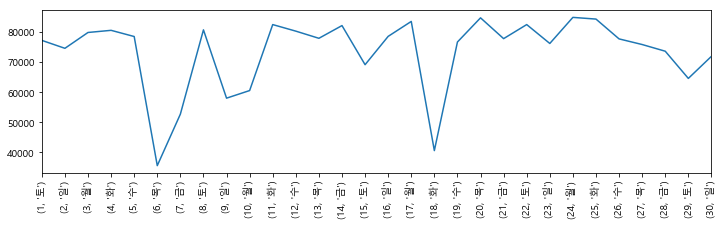

In [24]:
# 요일 별 요인이 강하게 있다고 보기 어렵다.

ax = daily_ride.plot(figsize = (12,3))
ax.set_xticks(np.arange(len(daily_ride)))
ax.set_xticklabels(daily_ride.index)
plt.xticks(rotation=90);

분석결과 >

6일은 현충일로 공유일임에도 18일과 같이 비가 와서 따릉이 이용률이 저조하였다. 따릉이 이용이 날씨에 영향을 받는다. 날씨 외에 요일별 영향은 없어 보인다.

### 2-3-2. 요일별 따릉이 이용건수

In [25]:
# 요일별 따릉이 이용건수

dayofweek_bike = bike_ride.pivot_table( \
                     index = '요일', \
                     values = '자전거번호', \
                     aggfunc = 'count')
dayofweek_bike.columns = ['이용건수']
dayofweek_bike

이용건수
요일        
금   286404
목   274200
수   313320
월   308913
일   359439
토   374302
화   288060

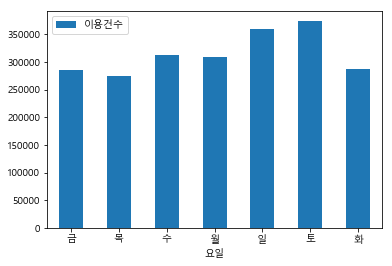

In [26]:
dayofweek_bike.plot(kind='bar', rot=0);

분석결과 >

주말이 평일보다 이용량이많고 평일은 목요일이 좀 이용량이 적다.

### 2-3-3. 구별 요일별 따릉이 이용건수

In [27]:
# 구별 요일별 따릉이 이용건수

dayofweek_gu_bike = bike_ride.pivot_table( \
                     index = '요일', \
                     columns = '대여구', \
                     values = '자전거번호', \
                     aggfunc = 'count')
dayofweek_gu_bike

대여구    강남구    강동구   강북구    강서구    관악구    광진구    구로구   금천구    노원구   도봉구  ...  \
요일                                                                      ...   
금    12927  10294  5025  19043  10314  17893  10038  4603  14317  4734  ...   
목    12220   9948  5043  18240  10271  18042   9775  4365  14166  4859  ...   
수    14138  10934  5777  21191  11502  19689  11123  5308  16457  5476  ...   
월    14360  10425  5409  19753  11189  19414  10976  5147  15836  5491  ...   
일    14732  12863  7117  21028  14423  23990  12185  4173  18928  6506  ...   
토    15481  13625  7235  22549  14881  24671  13089  4496  19354  6732  ...   
화    13143  10140  4944  18997  10618  18290  10585  5000  14525  4889  ...   

대여구    성동구    성북구    송파구    양천구   영등포구   용산구    은평구    종로구    중구   중랑구  
요일                                                                      
금    13465   9359  24789   8383  22969  5758   8144  11265  6971  7164  
목    12872   9091  22956   7837  21386  5525   7925  10348  6114  7124  
수    14246  10073  26123   9210  24934  6225   8777  12617  7596  8226  
월    14610   9893  25031   8643  25966  6794   8531  12244  7394  7837  
일    17521  11866  32692  10315  29838  8943  10496  12128  6592  9104  
토    17150  12072  34406  10864  30347  8944  11012  12702  7192  9749  
화    13916   9418  23680   8376  23519  5772   8048  10621  6666  7171  

[7 rows x 25 columns]

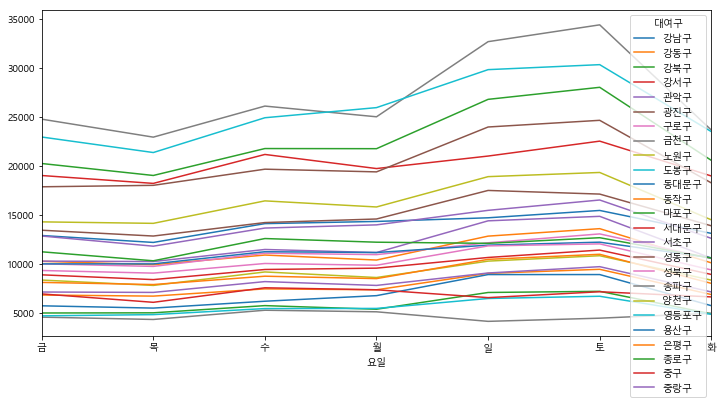

In [28]:
dayofweek_gu_bike.plot(figsize=(12, 6));

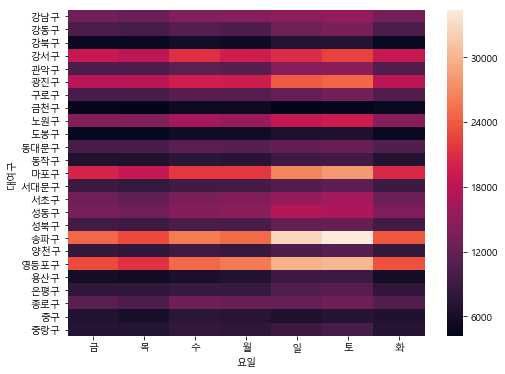

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(dayofweek_gu_bike.T);

분석결과 >

송파구는 주말에 이용량이 아주 많고, 영등포구, 마포구, 강서구, 광진구, 노원구도 이용량이 많은편으로 주말이 평일보다 많다. 이용량이 적은 나머지구도 주말이 평일보다 이용량이 많으나 전체적으로 이용량이 적은 곳도 많다.

## 2-4. 시간대별 따릉이 이용건수 분석

### 2-4-1. 주말과 평일의 시간대별 따릉이 이용건수 추이

In [30]:
# 24 시간의 각 시간대별로 공휴일, 주말, 평일의 자전거이용건수를 센다.

hourly_ride = bike_ride.pivot_table(\
                     index = '대여시간대', \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count')
hourly_ride

주말구분      주말      평일
대여시간대               
0      30408   43816
1      22916   33788
2      17126   23722
3      14942   15703
4       7648   10034
5       5172   11388
6       6643   23241
7       9268   58787
8      15318   99030
9      18853   52454
10     21548   37643
11     25386   42631
12     30493   48784
13     34905   50638
14     38089   51827
15     43560   54207
16     49063   69636
17     53650  105106
18     53307  168485
19     54922  117602
20     54041  102957
21     50676   99202
22     42964   89847
23     32843   60369

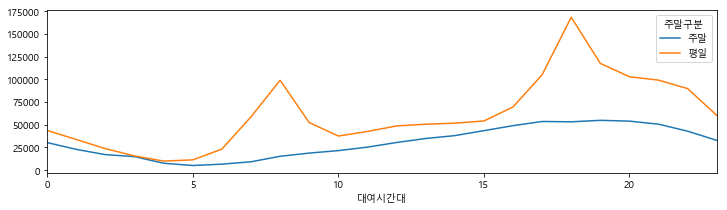

In [31]:
hourly_ride.plot(figsize = (12,3));

분석결과 >

주말은 오후로 갈수록 따릉이 이용이 증가하고 평일은 오전 8시 오후6시인 출퇴근 시간에 따릉이 이용이 많다.

### 2-4-2. 시간대별 대여와 반납 따릉이 이용건수 추이

In [32]:
대여시간대이용 = bike_ride.pivot_table( \
                     index = '대여시간대',  \
                     values = '자전거번호', \
                     aggfunc = 'count')

In [33]:
반납시간대이용 = bike_ride.pivot_table( \
                     index = '반납시간대',  \
                     values = '자전거번호', \
                     aggfunc = 'count')

In [34]:
시간대이용 = pd.concat([대여시간대이용, 반납시간대이용], axis=1 )
시간대이용.columns = ['대여량', '반납량']
시간대이용

대여량     반납량
0    74224   84826
1    56704   64623
2    40848   47270
3    30645   35224
4    17682   22836
5    16560   16741
6    29884   24536
7    68055   54723
8   114348  116016
9    71307   72799
10   59191   57171
11   68017   60962
12   79277   75363
13   85543   81780
14   89916   84659
15   97767   90435
16  118699  106429
17  158756  138391
18  221792  204479
19  172524  182743
20  156998  158532
21  149878  155374
22  132811  152951
23   93212  115775

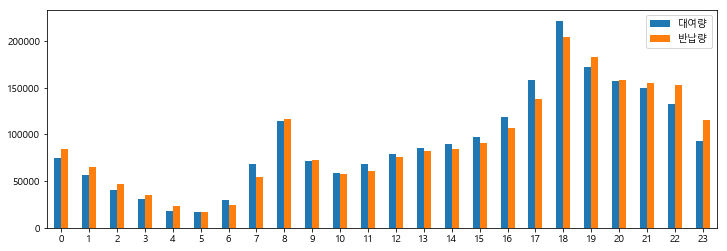

In [35]:
시간대이용.plot(kind='bar', rot=0, figsize=(12,4));

분석결과 >

오전 6시부터 오후 6시까지는 대여량이 반납량보다 많고 오후 7시부터 새벽5시까지는 반납량이 대여량보다 많다.

## 2-5. 시간에 따른 각 지역구의 사용량 살펴보기

### 2-5-1. 대여 대여소가 속한 구에 따라 따릉이 이용건수 알아보기

In [36]:
gu_time_rent = bike_ride.pivot_table( \
                     index = '대여시간대', \
                     columns = '대여구', \
                     values = '자전거번호', \
                     aggfunc = 'count')
gu_time_rent

대여구      강남구   강동구   강북구    강서구   관악구    광진구   구로구   금천구   노원구   도봉구  ...  \
대여시간대                                                                 ...   
0       2641  3230  2066   4457  3768   5312  2604   788  4843  1525  ...   
1       2655  2342  1706   3301  2823   3621  1763   645  3627  1297  ...   
2       2357  1852  1378   2442  1897   2469  1275   495  2606   853  ...   
3       1686  1398   932   1907  1547   1830   831   328  1932   668  ...   
4        920   620   595   1151   989    998   565   172  1051   403  ...   
5        648   686   392   1072   742    992   537   161   826   416  ...   
6       1315  1173   499   2142  1039   1687  1073   510  1408   498  ...   
7       2404  2420  1047   4849  2787   3512  3036  1579  2825  1120  ...   
8       4950  3728  1526   9350  4345   6988  4639  3227  4452  1541  ...   
9       3200  2413  1157   4762  2409   4939  2537  1324  3222  1189  ...   
10      2373  2247  1078   3719  2036   4208  2051   670  3169  1027  ...   
11      2728  2227  1178   4177  2202   4279  2144   890  3475  1122  ...   
12      3458  2708  1357   4896  2627   5006  2545   986  4095  1433  ...   
13      3744  3037  1505   5225  2863   5591  2920  1030  4508  1465  ...   
14      3946  3103  1572   5469  2951   6153  2780  1060  4966  1496  ...   
15      4444  3469  1656   5568  3108   6419  3263  1198  5330  1599  ...   
16      5466  3943  2037   6831  3917   7649  4212  1401  6299  1972  ...   
17      8302  5046  2418   9692  4976   9720  5720  2648  7831  2654  ...   
18     12622  6298  3119  14641  6692  11912  9043  5059  9111  3373  ...   
19      7683  5945  2791  11191  6357  11413  6356  2689  8297  2853  ...   
20      6157  5638  2730  10321  6331  10239  5472  2043  8136  2746  ...   
21      5604  5509  2902   9709  6365  10490  5172  1874  8000  2952  ...   
22      4541  5147  2728   8238  5840   9538  4241  1434  7864  2613  ...   
23      3157  4050  2181   5691  4587   7024  2992   881  5710  1872  ...   

대여구      성동구   성북구    송파구   양천구   영등포구   용산구   은평구   종로구    중구   중랑구  
대여시간대                                                                 
0       3003  3164   6011  2088   4880  1640  2388  1696  1179  2367  
1       2095  2501   5140  1765   3307  1334  1872  1299   893  1942  
2       1394  1941   3337  1141   2189   935  1328   978   683  1411  
3       1103  1337   2390   859   1623   755   975   748   563  1171  
4        743   696   1252   479   1101   512   508   552   407   578  
5        698   521   1086   562   1138   305   527   741   442   597  
6       1092  1088   2326   985   2682   541  1024  1079   538   826  
7       2587  2292   5214  2647   6495  1092  2419  2664  1259  2128  
8       5435  3713   9104  3861   9932  1854  3412  4317  2262  3059  
9       3451  2402   5552  2188   5235  1199  2318  3203  1658  1606  
10      2737  2173   4683  1716   4235  1019  1895  2645  1554  1458  
11      3199  2271   5216  1960   6267  1377  1979  3669  2086  1631  
12      3837  2459   6410  2264   6696  1481  2506  4030  2264  1896  
13      4037  2735   7053  2339   6802  1601  2508  4401  2492  2058  
14      4604  2772   7819  2425   7246  1798  2418  4369  2592  2022  
15      5061  3125   8399  2682   7807  2410  2728  4544  2872  2246  
16      5844  3762  10167  3400  10119  2772  3071  5396  3084  2688  
17      8390  4436  13009  4020  15505  3496  4010  7179  4346  3577  
18     12115  5277  19710  6056  21488  5359  5131  8944  5851  4372  
19      8338  4930  16201  4564  13821  4136  4551  5450  3269  4139  
20      7322  4878  14963  4414  12689  3720  4399  4450  2601  4025  
21      6828  4959  14014  4205  11510  3600  4132  4007  2370  3928  
22      5929  4592  12389  4320   9739  3059  3898  3316  1908  3825  
23      3938  3748   8232  2688   6453  1966  2936  2248  1352  2825  

[24 rows x 25 columns]

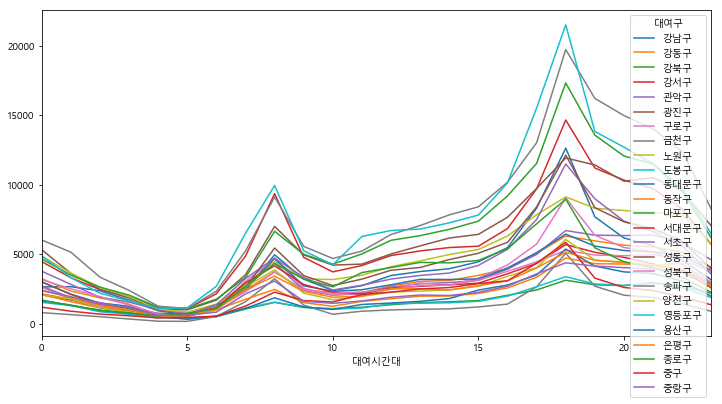

In [37]:
# 구별로 시간대 따릉이 대여건수 경향을 본다. 

gu_time_rent.plot(figsize=(12,6));

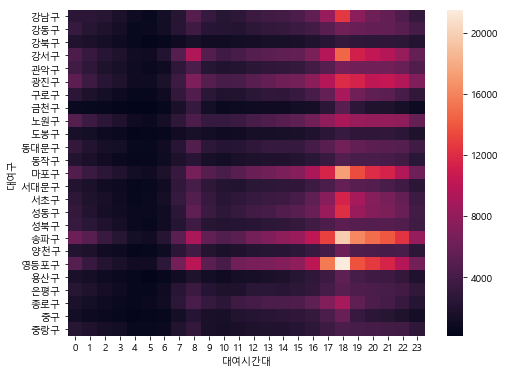

In [38]:
# heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(gu_time_rent.T);

분석결과 >

모든구가 출퇴근 시간인 오전 8시와 오후 6시에 대여량이 많다. 출근시간대보다는 퇴근시간대에 이용량이 많다. 특히 영등포구는 오후 6시에 대여량이 많다. 영등포구 다음으로 송파구, 마포구, 강서구, 광진구, 강남구, 종로구 등이 퇴근시간에 대여량이 많다.

### 2-5-2. 반납 대여소가 속한 구에 따라 따릉이 이용건수 알아보기

In [39]:
gu_time_takeoff = bike_ride.pivot_table( \
                     index = '반납시간대', \
                     columns = '반납구', \
                     values = '자전거번호', \
                     aggfunc = 'count')
gu_time_takeoff

반납구     강남구   강동구   강북구    강서구   관악구    광진구   구로구   금천구   노원구   도봉구  ...  \
반납시간대                                                                ...   
0      3002  3811  2134   5360  4388   5836  2711   924  5050  2028  ...   
1      2685  2788  1780   3939  3531   3996  2009   769  3946  1516  ...   
2      2244  2399  1556   2937  2404   2818  1458   538  2875  1120  ...   
3      1707  1579  1118   2233  1873   2035  1027   416  2194   938  ...   
4      1149   978   716   1433  1134   1289   733   285  1287   563  ...   
5       625   697   467   1069   727    944   614   195   860   422  ...   
6      1003   925   370   1774   823   1358   821   499  1116   409  ...   
7      2264  1744   759   3989  1673   2702  2495  1290  2358   811  ...   
8      5915  3111  1438   9244  3139   5107  5132  4001  4323  1334  ...   
9      3797  2120  1167   4862  2050   4617  2962  1574  3404  1012  ...   
10     2513  2027  1066   3478  1751   3954  2042   661  3053   894  ...   
11     2428  1972  1035   3827  1976   3950  2035   764  3400  1013  ...   
12     3254  2470  1182   4659  2309   4793  2479   977  4010  1335  ...   
13     3544  2792  1369   4986  2582   5344  2720   990  4368  1314  ...   
14     3477  2992  1494   5303  2648   5756  2748   952  4766  1440  ...   
15     3862  3287  1574   5257  2816   6239  2877  1057  5064  1502  ...   
16     4318  3620  1955   6117  3502   7077  3478  1169  5569  1842  ...   
17     5987  4707  2346   8385  4600   9406  4705  1935  7072  2278  ...   
18     8565  6817  3226  13908  7436  12804  8140  3873  9037  3311  ...   
19     6969  6924  2852  12484  7418  12224  6917  2758  8708  3067  ...   
20     5600  5925  2783  10799  6381  10833  5697  2076  8145  2925  ...   
21     5426  6214  2799  10348  6808  10364  5405  2003  8161  3143  ...   
22     5030  6457  3054  10173  6704  10489  5100  1800  8658  3440  ...   
23     3832  5218  2620   7376  5664   7941  3783  1294  6647  2591  ...   

반납구     성동구   성북구    송파구   양천구   영등포구   용산구   은평구   종로구    중구   중랑구  
반납시간대                                                                
0      3542  3711   6847  2539   5408  1820  3084  1661  1088  3085  
1      2592  2870   5354  1910   3736  1545  2563  1247   762  2423  
2      1742  2094   3757  1434   2765  1025  1660   958   572  1722  
3      1349  1476   2784  1064   1883   809  1232   699   403  1475  
4       802  1005   1750   732   1386   578   769   542   309   858  
5       666   683   1136   494   1233   328   463   568   434   650  
6       916   755   2040   803   2273   391   794   991   699   727  
7      2636  1333   4133  1785   6122   871  1772  2600  1705  1334  
8      8250  2330   9234  3526  12441  1930  2863  5293  3519  2282  
9      4124  1945   5582  2000   5737  1180  1854  3857  2200  1377  
10     2799  1916   4543  1600   4202  1010  1648  2951  1617  1338  
11     2792  1970   4793  1715   5295  1218  1695  3317  2014  1344  
12     3641  2222   6034  2165   6799  1447  2209  4044  2300  1613  
13     3796  2631   6965  2285   6706  1556  2426  4429  2505  1956  
14     4229  2634   7281  2299   6594  1700  2265  4369  2449  2020  
15     4731  2798   8076  2519   7058  2186  2462  4295  2560  2148  
16     5275  3354   9711  3203   9051  2434  2772  4909  2759  2639  
17     7011  4170  12090  3873  11943  3095  3750  5811  3441  3477  
18     9272  5857  18781  6416  17879  4664  5696  7341  4153  4895  
19     8182  5455  17221  5620  14268  4325  5774  5188  2951  4944  
20     7090  4820  15295  4629  12960  3862  4685  3659  2226  4437  
21     6988  5375  14350  4647  12332  3849  4809  3340  1941  4383  
22     6633  5579  13885  4846  11091  3604  5204  2886  1767  4893  
23     4774  4510   9996  3460   8275  2676  3941  2169  1398  3841  

[24 rows x 25 columns]

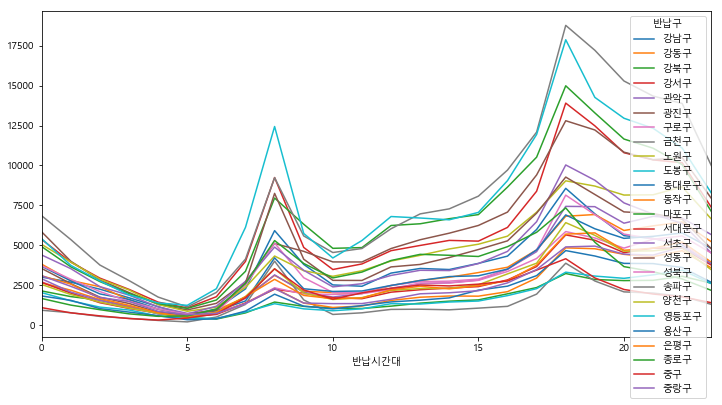

In [40]:
# 구별로 시간대 따릉이 반납건수 경향을 본다. 

gu_time_takeoff.plot(figsize=(12,6));

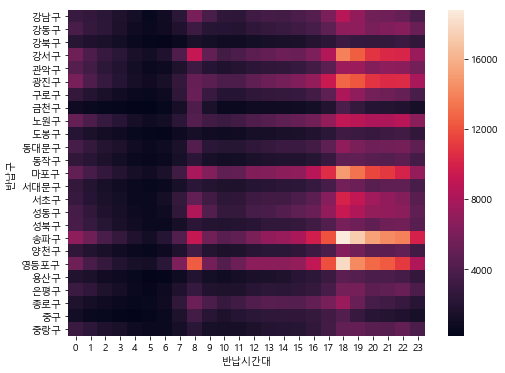

In [41]:
# heatmap으로 표현한다. 흐린색일수록 이용건수가 많다.

fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(gu_time_takeoff.T);

분석결과 >

구별로 시간대별 대여건수와 반납건수를 살펴본 결과, 모든 구가 비슷하게 오전 8시와 오후 6시에 이용건수가 많다.

출근시간대인 오전 8시는 영등포구가 가장 반납량이 많고 퇴근시간대인 오후 6시에는 송파구와 영등포구가 반납량이 가장 많다. 그 다음으로 영등포구, 마포구, 강서구, 광진구도 반납량이 많은 편이다.

### 2-5-3. 시간대별 대여량과 반납량 비교

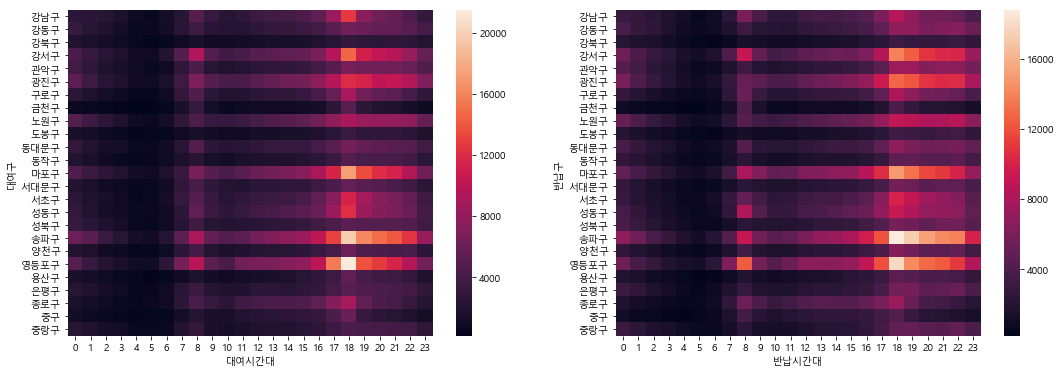

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
sns.heatmap(gu_time_rent.T, ax=ax[0])
sns.heatmap(gu_time_takeoff.T, ax=ax[1]);

### 2-5-4. 출근시간 오전 8시와 퇴근시간 오후 6시 이용량 관찰

In [43]:
# 출근시간인 8시대 구별 따릉이 대여량을 알아본다. 반납량 = 1-대여량

to_work_df = bike_ride[bike_ride['대여시간대'] == 8]

출근대여 = to_work_df.pivot_table( \
                       index = '대여구', \
                       values = '자전거번호', \
                       aggfunc = 'count'                      
                      )

출근반납 = to_work_df.pivot_table( \
                       index = '반납구', \
                       values = '자전거번호', \
                       aggfunc = 'count'                      
                      )

출근총합 = 출근대여.add(출근반납, axis=1)
출근대여율 = 출근대여.div(출근총합, axis=1)
출근반납율 = 출근반납.div(출근총합, axis=1)

출근이용율 = pd.concat([출근대여율, 출근반납율], axis=1)
출근이용율.columns = ['출근대여율', '출근반납율']
출근이용율.sort_values(by='출근대여율', ascending=True, inplace=True)
출근이용율

출근대여율  출근반납율
중구     0.39   0.61
성동구    0.40   0.60
마포구    0.44   0.56
종로구    0.45   0.55
금천구    0.46   0.54
강남구    0.46   0.54
영등포구   0.47   0.53
구로구    0.49   0.51
송파구    0.49   0.51
서초구    0.50   0.50
노원구    0.50   0.50
용산구    0.51   0.49
강서구    0.51   0.49
강북구    0.51   0.49
동작구    0.53   0.47
도봉구    0.53   0.47
양천구    0.53   0.47
동대문구   0.54   0.46
강동구    0.55   0.45
은평구    0.55   0.45
광진구    0.57   0.43
관악구    0.58   0.42
중랑구    0.58   0.42
성북구    0.61   0.39
서대문구   0.64   0.36

In [44]:
# 퇴근시간인 18시대 구별 따릉이 대여량을 알아본다. 반납량 = 1-대여량

go_home_df = bike_ride[bike_ride['대여시간대'] == 18]

퇴근대여 = go_home_df.pivot_table( \
                       index = '대여구', \
                       values = '자전거번호', \
                       aggfunc = 'count'                      
                      )

퇴근반납 = go_home_df.pivot_table( \
                       index = '반납구', \
                       values = '자전거번호', \
                       aggfunc = 'count'                      
                      )

퇴근총합 = 퇴근대여.add(퇴근반납, axis=1)
퇴근대여율 = 퇴근대여.div(퇴근총합, axis=1)
퇴근반납율 = 퇴근반납.div(퇴근총합, axis=1)

퇴근이용율 = pd.concat([퇴근대여율, 퇴근반납율], axis=1)
퇴근이용율.columns = ['퇴근대여율', '퇴근반납율']
퇴근이용율.sort_values(by='퇴근대여율', ascending=True, inplace=True)
퇴근이용율

퇴근대여율  퇴근반납율
은평구    0.44   0.56
중랑구    0.44   0.56
관악구    0.44   0.56
강동구    0.46   0.54
동작구    0.46   0.54
성북구    0.46   0.54
광진구    0.46   0.54
양천구    0.46   0.54
동대문구   0.47   0.53
서대문구   0.48   0.52
강북구    0.48   0.52
노원구    0.48   0.52
도봉구    0.49   0.51
강서구    0.49   0.51
송파구    0.49   0.51
구로구    0.50   0.50
용산구    0.50   0.50
서초구    0.51   0.49
마포구    0.52   0.48
영등포구   0.53   0.47
금천구    0.55   0.45
종로구    0.55   0.45
성동구    0.56   0.44
강남구    0.58   0.42
중구     0.59   0.41

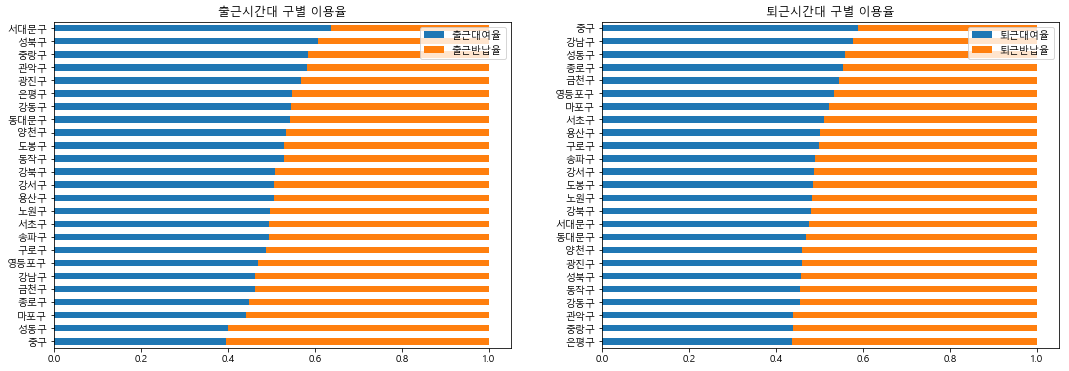

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))
출근이용율.plot(kind='barh', stacked=True, title='출근시간대 구별 이용율', ax=ax[0])
퇴근이용율.plot(kind='barh', stacked=True, title='퇴근시간대 구별 이용율', ax=ax[1]);

분석결과 >

출근시간대는 서대문구, 성북구, 중랑구, 관악구 등이 대여량이 많고, 중구, 성동구, 마포구, 종로구에 반납량이 많다.

퇴근시간대는 중구, 강남구, 성동구, 종로구 등이 대여량이 많고, 은평구, 중랑구, 관악구 등이 반납량이 많다.

### 2-5-5. 출근시간 오전 8시 구별 대여량 관찰

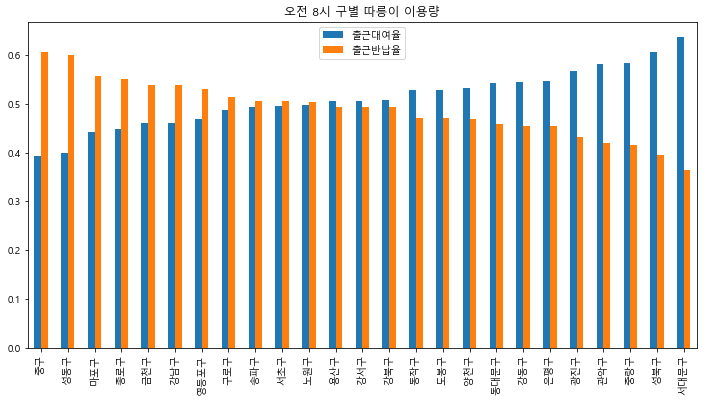

In [46]:
출근이용율.plot(kind='bar', figsize=(12, 6), title='오전 8시 구별 따릉이 이용량');

분석결과 >

출근시간대는 중구, 성동구, 마포구, 종로구에 대여율이 반납율보다 훨씬 많다.

서대문구, 성북구, 중랑구, 관악구는 대여율이 반납율보다 훨씬 많다.


### 2-5-6. 퇴근시간 18시 구별 대여량 관찰

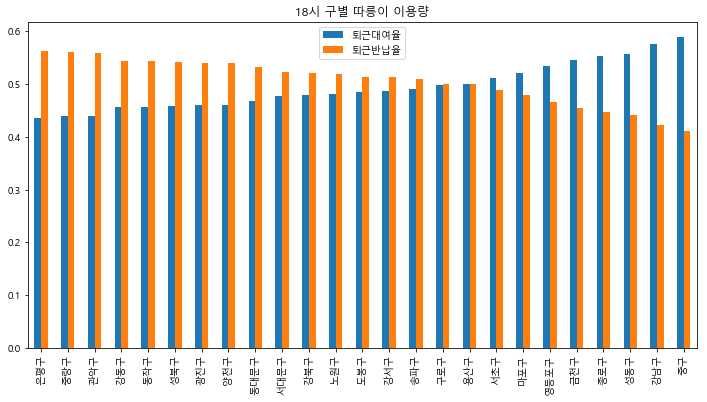

In [47]:
퇴근이용율.plot(kind='bar', figsize=(12, 6), title='18시 구별 따릉이 이용량');

분석결과 >

퇴근시간대에는 은평구, 중랑구, 관악구가 반납율이 대여율에 비해 많다.

반면, 중구, 강남구, 성동구, 종로구는 대여율이 반납율보다 많다.

## 2-6. 이용건수가 많은 대여소

### 2-6-1. 대여 대여소를 중심으로 분석

In [48]:
# 대여 대여소의 이용건수 계산

rent_bike = bike_ride.pivot_table( \
                     index = ['대여 대여소명', '대여점위도', '대여점경도'], \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count')
rent_bike.head()

주말구분                           주말    평일
대여 대여소명         대여점위도 대여점경도            
(구)신한은행 중랑교지점   37.60 127.08  389   832
(구)합정동 주민센터     37.55 126.91  357   715
3호선 매봉역 3번출구앞   37.49 127.05  443  1047
419민주묘지역        37.65 127.01  547   946
8삼호@ 2동 ( 간선도로) 37.49 127.05  110   316

In [49]:
# 주말에 대여량이 많은 대여소 알기

주말대여점10 = rent_bike.nlargest(10, '주말')['주말'].reset_index()
주말대여점10

대여 대여소명  대여점위도  대여점경도    주말
0            뚝섬유원지역 1번출구 앞  37.53 127.07  5776
1             여의나루역 1번출구 앞  37.53 126.93  5272
2  고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  3922
3                  봉림교 교통섬  37.48 126.93  3691
4        롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  3231
5               마포구민체육센터 앞  37.56 126.90  3224
6         건대입구역 사거리(롯데백화점)  37.54 127.07  3168
7             홍대입구역 2번출구 앞  37.56 126.92  2921
8            잠실새내역 5번 출구 뒤  37.51 127.09  2632
9                    당산육갑문  37.54 126.90  2307

In [50]:
# 평일에 대여량이 많은 대여소 알기

평일대여점10 = rent_bike.nlargest(10, '평일')['평일'].reset_index()
평일대여점10

대여 대여소명  대여점위도  대여점경도    평일
0            뚝섬유원지역 1번출구 앞  37.53 127.07  6839
1             여의나루역 1번출구 앞  37.53 126.93  6214
2                  봉림교 교통섬  37.48 126.93  5974
3             홍대입구역 2번출구 앞  37.56 126.92  5615
4        롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  5382
5            마곡나루역 5번출구 뒤편  37.57 126.83  4646
6         건대입구역 사거리(롯데백화점)  37.54 127.07  4572
7  고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  4539
8              양천향교역 7번출구앞  37.57 126.84  4339
9            안암로터리 버스정류장 앞  37.58 127.03  4103

In [51]:
# 위에서 구한 주말대여점10과 평일대여점10을 지도에 표시하기 위해서 필요한 라이브러리를 임포트한다.

import folium
from folium import plugins

In [115]:
# 주말대여점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말대여점10['대여점위도'].mean()
lon = 주말대여점10['대여점경도'].mean()
center = [lat, lon]
map = folium.Map(location = center, zoom_start = 12)

for i in 주말대여점10.index.values:
    
    sub_lat = 주말대여점10.loc[i, '대여점위도']
    sub_lon = 주말대여점10.loc[i, '대여점경도']
    title = 주말대여점10.loc[i,'대여 대여소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_lon], popup = title).add_to(map)

#한글이 안나오는 오류로 html로 trouble shooting 
#map.save('example.html')

map

In [116]:
# 평일에 대여량이 많은 대여소 지도에 표시하기

for index, row in 평일대여점10.iterrows():
    folium.Marker([row['대여점위도'], row['대여점경도']], popup=row['대여 대여소명'], \
                 icon=folium.Icon(color='red',icon='star')).add_to(map)

map

In [117]:
# 주말대여점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말대여점10['대여점위도'].mean()
lon = 주말대여점10['대여점경도'].mean()
center = [lat, lon]
map = folium.Map(location = center, zoom_start = 12)

for i in 주말대여점10.index.values :
 
    # 표시 마커 설정
    folium.CircleMarker(
        location = [주말대여점10.loc[i,'대여점위도'], 주말대여점10.loc[i,'대여점경도']],
        radius = 6,
        color = 'blue',
        fill = True,
        fill_color = 'blue'
        ).add_to(map)
    
    
# 평일에 대여량이 많은 대여소 지도에 표시하기

for index, row in 평일대여점10.iterrows():
    folium.CircleMarker(
        location = [row['대여점위도'], row['대여점경도']], 
        radius = 3,
        color = 'red',
        fill = True, 
        fill_color = 'red'
        ).add_to(map)

map


분석결과 >

주말과 평일에 모두 이용량이 많은 대여점이 7개가 겹친다.

### 2-6-2. 반납 대여소를 중심으로 분석

In [54]:
# 대여 대여소의 이용건수 계산

takeoff_bike = bike_ride.pivot_table( \
                     index = ['반납대여소명', '반납점위도', '반납점경도'], \
                     columns = '주말구분', \
                     values = '자전거번호', \
                     aggfunc = 'count')
takeoff_bike.head()

주말구분                           주말    평일
반납대여소명          반납점위도 반납점경도            
(구)신한은행 중랑교지점   37.60 127.08  405   961
(구)합정동 주민센터     37.55 126.91  348   722
3호선 매봉역 3번출구앞   37.49 127.05  441  1034
419민주묘지역        37.65 127.01  577   949
8삼호@ 2동 ( 간선도로) 37.49 127.05   94   257

In [55]:
# 주말에 반납량이 많은 대여소 알기

주말반납점10 = takeoff_bike.nlargest(10, '주말')['주말'].reset_index()
주말반납점10

반납대여소명  반납점위도  반납점경도    주말
0            뚝섬유원지역 1번출구 앞  37.53 127.07  6582
1             여의나루역 1번출구 앞  37.53 126.93  5618
2  고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  4168
3                  봉림교 교통섬  37.48 126.93  3725
4               마포구민체육센터 앞  37.56 126.90  3636
5         건대입구역 사거리(롯데백화점)  37.54 127.07  3317
6             홍대입구역 2번출구 앞  37.56 126.92  3265
7        롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  3231
8            잠실새내역 5번 출구 뒤  37.51 127.09  2740
9                  CJ 드림시티  37.60 126.92  2417

In [56]:
# 평일에 반납량이 많은 대여소 알기

평일반납점10 = takeoff_bike.nlargest(10, '평일')['평일'].reset_index()
평일반납점10

반납대여소명  반납점위도  반납점경도    평일
0            뚝섬유원지역 1번출구 앞  37.53 127.07  7426
1             홍대입구역 2번출구 앞  37.56 126.92  6816
2                  봉림교 교통섬  37.48 126.93  6045
3             여의나루역 1번출구 앞  37.53 126.93  5790
4        롯데월드타워(잠실역2번출구 쪽)  37.51 127.10  5404
5            안암로터리 버스정류장 앞  37.58 127.03  4713
6            마곡나루역 5번출구 뒤편  37.57 126.83  4698
7         건대입구역 사거리(롯데백화점)  37.54 127.07  4679
8  고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00  4611
9               마포구민체육센터 앞  37.56 126.90  4537

In [57]:
# 주말반납점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 12)

for i in 주말반납점10.index.values:
    
    sub_lat = 주말반납점10.loc[i, '반납점위도']
    sub_lon = 주말반납점10.loc[i, '반납점경도']
    title = 주말반납점10.loc[i,'반납대여소명']
    
    #지도에 데이터 찍어서 보여주기
    folium.Marker([sub_lat,sub_lon], popup = title, \
                 icon=folium.Icon(color='gray')).add_to(map)

#한글이 안나오는 오류로 html로 trouble shooting 
#map.save('example.html')

map

In [58]:
# 평일에 반납량이 많은 대여소 지도에 표시하기

for index, row in 평일반납점10.iterrows():
    folium.Marker([row['반납점위도'], row['반납점경도']], popup=row['반납대여소명'], \
                 icon=folium.Icon(color='pink',icon='star')).add_to(map)

map

In [138]:
# 주말대여점10 위치의 가운데 지점의 위도와 경도를 중심으로 map을 그려본다.

lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
center = [lat, lon]
map = folium.Map(location = center, zoom_start = 12)

for i in 주말반납점10.index.values :
 
    # 표시 마커 설정
    folium.CircleMarker(
        location = [주말반납점10.loc[i,'반납점위도'], 주말반납점10.loc[i,'반납점경도']],
        radius = 6,
        color = 'black',
        fill = True,
        fill_color = 'black'
        ).add_to(map)
    
    
# 평일에 대여량이 많은 대여소 지도에 표시하기

for index, row in 평일반납점10.iterrows():
    folium.CircleMarker(
        location = [row['반납점위도'], row['반납점경도']], 
        radius = 3,
        color = 'red',
        fill = True, 
        fill_color = 'red'
        ).add_to(map)

map


분석결과 >

주말과 평일의 반납점도 8개가 겹친다.

## 2-7. 평균 이용거리, 이용시간이 높은 지역은 어딜까?

### 2-7-1. 이용거리

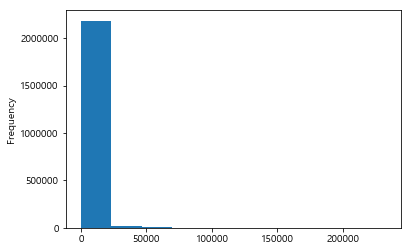

In [59]:
# 이용거리 데이터가 집중되어 있다.

bike_ride['이용거리'].plot(kind='hist');

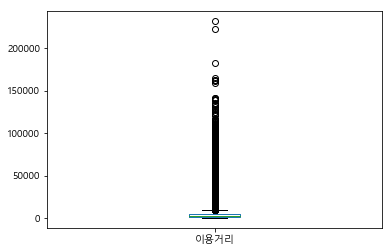

In [60]:
bike_ride['이용거리'].plot(kind='box');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6641: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


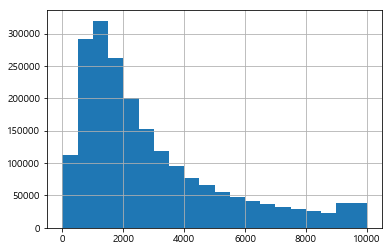

In [61]:
# 이용거리 데이터분포를 알아본다.

bike_ride['이용거리'].hist(bins = [0,500,1000,1500,2000,2500,3000,3500,4000,4500,5000,
                               5500,6000,6500,7000,7500,8000,8500,9000,10000,np.inf]);

### 2-7-2.구별 이용거리 평균

In [62]:
day_gu_distance = bike_ride.pivot_table( \
                     index = '일자', \
                     columns = '대여구', \
                     values = '이용거리', \
                     aggfunc = 'mean')
day_gu_distance

대여구     강남구     강동구     강북구     강서구     관악구     광진구     구로구     금천구     노원구  \
일자                                                                            
1   5320.44 3665.97 3537.47 3940.99 4439.81 4075.40 4632.50 5219.66 3690.93   
2   5168.40 3963.30 3787.83 4155.44 4395.34 3938.49 4829.95 5503.08 3967.33   
3   4731.89 3376.47 3223.21 3342.41 3994.69 3189.90 3901.77 3956.11 3443.61   
4   4436.31 3150.44 3125.50 3113.14 4009.02 3129.23 3754.47 3745.57 3417.55   
5   4330.41 3349.80 3108.51 3015.07 3774.12 3174.14 3735.51 4224.74 3269.38   
6   4526.48 3402.23 3382.93 3405.37 3900.46 3092.11 4421.01 4487.08 3235.01   
7   5233.64 3475.26 3527.65 3695.62 4557.24 3756.69 4229.88 4444.07 3848.87   
8   5252.73 3750.72 3781.73 4009.92 4642.04 3925.34 4987.82 5421.38 3930.34   
9   4810.30 3380.71 3463.10 3974.04 4114.48 3342.87 4388.93 5171.68 3655.25   
10  4700.55 3516.67 3251.54 3376.17 3917.58 3173.14 4045.71 4458.77 3421.10   
11  4679.25 3245.11 3339.55 3129.88 3774.02 3218.32 3884.08 3711.94 3256.92   
12  4538.76 3175.56 3200.41 3137.53 3754.65 3153.57 3741.80 3602.58 3217.89   
13  4357.52 3212.45 3032.46 3140.33 3907.88 3221.99 3914.59 3962.58 3371.50   
14  4469.94 3349.79 3116.61 3089.18 3881.74 3241.02 3915.45 3716.56 3411.96   
15  4881.91 3380.27 3390.40 3506.34 4422.14 3493.54 4506.43 4739.32 3533.19   
16  5587.86 3964.57 3655.77 4246.53 4700.80 4017.35 4923.92 5503.63 4032.65   
17  4721.70 3357.98 3158.29 3350.90 4151.26 3255.00 4126.10 4101.42 3363.86   
18  3427.57 2836.01 2708.37 2493.33 3089.76 2369.28 3377.10 3145.09 2838.52   
19  4474.23 3061.99 3316.32 3078.93 3824.81 2986.65 3852.64 3926.75 3351.43   
20  4591.66 3267.74 3233.78 3035.83 4035.56 3144.70 4083.36 3782.88 3503.35   
21  4202.55 2989.90 2797.87 2902.49 3711.97 2962.53 3744.73 3658.20 3093.39   
22  5360.20 3826.35 3662.37 4005.00 4403.80 4002.59 4483.56 4973.21 3970.37   
23  5378.67 3864.50 3696.00 4139.44 4602.54 4169.80 4871.02 5612.71 4166.05   
24  4787.49 3318.40 3144.66 3238.50 4027.21 3503.60 4089.93 3988.09 3691.04   
25  4600.97 3181.79 3155.94 3169.57 3855.17 3321.81 3778.72 3831.82 3382.31   
26  4280.33 3011.38 2983.58 2732.74 3444.10 2846.95 3423.71 3304.40 3124.62   
27  4353.29 3146.47 3100.47 2966.83 3977.75 3157.93 3721.70 3501.34 3406.37   
28  4111.99 3004.62 2909.33 2635.55 3548.85 2972.45 3624.55 3767.25 3121.49   
29  5555.78 3909.07 3598.84 3563.28 4442.74 3948.37 4256.76 5131.29 3951.71   
30  5284.54 3992.07 3384.01 3744.84 4487.49 4023.19 4835.66 5120.19 4140.89   

대여구     도봉구  ...     성동구     성북구     송파구     양천구    영등포구     용산구     은평구  \
일자           ...                                                           
1   4372.56  ... 5040.95 3785.75 4118.07 3806.33 4826.52 6164.59 4021.74   
2   4133.53  ... 4970.39 3842.85 4349.21 4026.40 5206.76 5354.59 4182.86   
3   3454.63  ... 4214.65 3466.61 3658.82 3343.57 3925.35 4853.12 3643.73   
4   3510.16  ... 4122.29 3410.29 3620.26 3532.58 3817.60 5037.23 3293.58   
5   3647.55  ... 4138.19 3256.88 3474.52 3465.41 3725.52 4791.05 3187.55   
6   3472.02  ... 4168.46 3307.69 3563.34 3500.17 4207.05 4921.49 3538.84   
7   3733.17  ... 4886.56 3666.63 3932.08 4015.11 4821.74 5682.78 3988.79   
8   3931.73  ... 5203.09 3837.10 4397.22 4193.57 5099.93 5895.01 4387.89   
9   4006.71  ... 4679.32 3301.17 3872.45 3867.61 4361.13 5719.95 4151.09   
10  3884.04  ... 4484.96 3455.07 3800.05 3744.96 4345.70 5789.48 3695.83   
11  3539.64  ... 4199.34 3446.93 3587.06 3438.40 4078.97 5187.79 3442.29   
12  3535.92  ... 4194.51 3385.24 3531.74 3370.73 3882.32 5153.49 3516.52   
13  3376.56  ... 4200.05 3332.29 3607.28 3602.42 3936.53 5278.07 3393.47   
14  3746.83  ... 4177.48 3387.43 3668.01 3509.56 4055.63 5308.57 3455.28   
15  3834.91  ... 4496.08 3614.24 3819.19 3687.05 4433.95 5502.07 3876.17   
16  4219.50  ... 4937.74 3815.89 4534.97 4201.47 5108.62 6274.66 4240.68   
17  3645.98  ... 4215.77 3357.81 3667.73 3665.03 4114.91 5178.71 3507.24   
18  3105.72  ... 2978.85 26

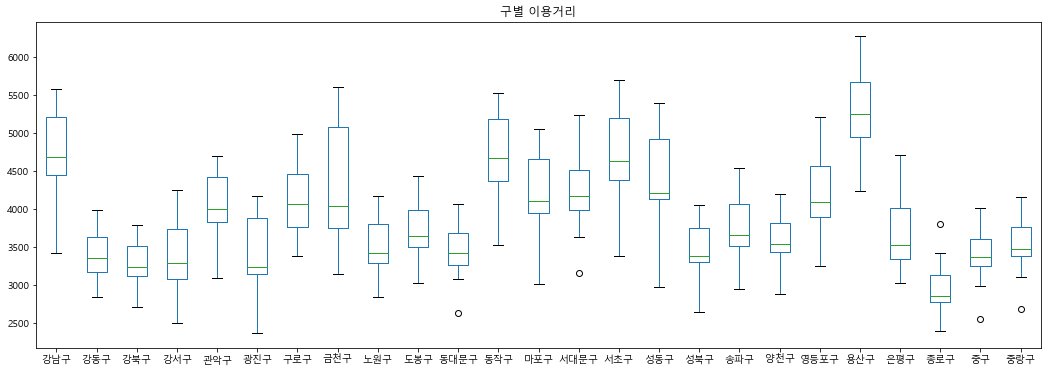

In [63]:
day_gu_distance.plot(kind='box', figsize=(18, 6), title='구별 이용거리');

### 2-7-3. 이용시간

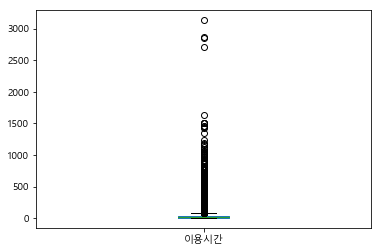

In [64]:
# 이용시간 분포
bike_ride['이용시간'].plot(kind = 'box');

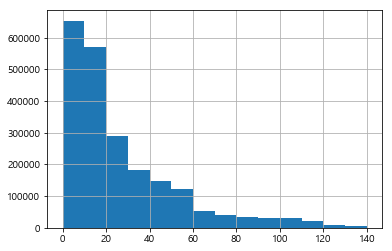

In [65]:
# 이용시간 데이터분포를 알아본다.

bike_ride['이용시간'].hist(bins = [0,10,20,30,40,50,60,70,80,90,
                               100,110,120,130,140,np.inf]);

### 2-7-4. 구별 이용시간 평균

In [66]:
day_gu_time = bike_ride.pivot_table( \
                     index = '일자', \
                     columns = '대여구', \
                     values = '이용시간', \
                     aggfunc = 'mean')
day_gu_time

대여구   강남구   강동구   강북구   강서구   관악구   광진구   구로구   금천구   노원구   도봉구  ...   성동구  \
일자                                                               ...         
1   37.04 29.16 26.47 27.36 29.81 31.00 30.92 33.30 26.67 28.03  ... 37.72   
2   37.24 30.33 27.50 28.56 31.78 30.52 32.35 36.55 27.84 28.88  ... 36.64   
3   29.41 24.60 22.53 22.28 25.27 22.62 23.52 23.88 23.28 23.50  ... 27.52   
4   29.04 23.77 20.87 21.90 25.05 22.08 23.89 22.36 22.87 23.84  ... 26.53   
5   29.30 23.24 21.78 20.88 25.17 23.36 23.17 25.29 22.20 24.37  ... 27.00   
6   29.98 24.09 22.06 23.62 26.06 22.53 29.11 30.71 21.99 25.62  ... 30.65   
7   35.04 27.10 25.40 26.12 29.82 27.85 28.33 29.86 26.71 25.63  ... 33.64   
8   38.17 28.80 26.76 28.34 30.53 30.18 32.29 35.12 27.47 25.96  ... 37.69   
9   32.24 24.93 25.57 25.94 27.62 23.77 28.46 34.77 24.45 26.18  ... 32.39   
10  30.88 25.85 24.16 23.81 25.29 22.91 25.50 27.80 24.09 24.34  ... 28.83   
11  30.17 24.55 22.92 21.44 23.82 23.11 24.60 22.74 22.30 23.00  ... 27.35   
12  29.83 23.96 21.53 21.11 24.07 22.81 23.96 21.87 22.04 22.78  ... 27.36   
13  29.33 24.05 21.86 21.30 24.50 22.63 25.23 24.98 23.01 23.10  ... 27.35   
14  30.32 24.48 21.66 20.98 24.22 23.26 25.44 24.11 23.70 24.80  ... 28.25   
15  34.73 26.31 25.18 25.74 28.40 26.06 29.78 32.22 24.79 26.06  ... 33.23   
16  38.52 29.93 27.08 29.39 31.63 29.28 31.56 35.85 27.49 29.21  ... 36.08   
17  30.31 24.71 22.87 22.36 26.60 23.33 26.20 24.55 22.87 24.64  ... 28.41   
18  23.61 19.74 18.30 17.22 19.49 17.22 20.25 18.93 20.55 19.46  ... 20.84   
19  28.88 22.66 22.70 20.80 24.71 21.43 23.45 24.18 22.76 22.89  ... 24.96   
20  29.86 23.64 22.31 20.69 25.12 23.28 25.47 23.81 23.68 23.87  ... 26.58   
21  28.00 22.44 20.57 20.25 23.28 21.46 23.74 23.24 21.63 22.65  ... 25.38   
22  40.24 29.48 27.72 28.10 30.09 30.96 30.20 33.68 26.56 28.36  ... 36.01   
23  38.06 29.48 27.88 28.44 31.42 30.34 31.76 37.82 28.67 30.37  ... 38.48   
24  30.70 24.71 22.89 21.77 24.96 25.16 26.03 24.66 24.72 23.70  ... 29.41   
25  30.49 23.33 22.01 21.28 24.40 24.06 23.76 23.42 23.07 24.68  ... 27.78   
26  27.81 21.14 20.06 18.57 21.06 20.73 22.31 20.71 21.67 22.53  ... 23.22   
27  27.97 23.14 22.01 20.35 24.93 23.32 23.45 21.62 22.98 22.54  ... 25.94   
28  26.83 21.63 20.50 18.35 22.37 20.98 22.90 23.40 21.72 19.93  ... 25.31   
29  37.67 29.34 25.77 25.66 29.42 28.26 28.80 30.98 26.98 28.94  ... 34.50   
30  34.60 29.09 24.28 26.34 29.05 28.93 30.63 31.60 27.44 27.30  ... 34.84   

대여구   성북구   송파구   양천구  영등포구   용산구   은평구   종로구    중구   중랑구  
일자                                                         
1   26.22 33.10 28.85 36.82 42.36 28.81 25.55 28.89 26.93  
2   26.15 33.45 29.19 37.51 38.81 29.62 25.72 28.67 29.57  
3   23.21 25.47 22.59 25.74 30.84 23.92 21.70 25.80 23.24  
4   21.54 25.42 24.22 25.19 31.63 22.25 21.91 24.22 22.58  
5   21.30 25.19 24.43 25.68 30.72 22.27 22.05 26.18 22.37  
6   22.52 26.27 23.78 28.65 33.73 22.85 20.49 22.77 22.80  
7   25.84 29.50 28.24 32.05 39.67 29.05 25.20 28.58 24.98  
8   25.81 34.12 30.61 37.83 41.00 30.07 27.79 28.88 28.40  
9   23.14 28.74 27.18 30.79 36.21 27.64 28.77 30.51 25.18  
10  23.43 27.29 26.02 28.52 36.85 25.48 23.23 26.57 23.14  
11  22.23 26.03 23.46 26.43 33.89 23.19 22.63 24.53 23.14  
12  21.27 25.39 24.09 25.87 31.80 22.96 22.48 25.38 21.79  
13  21.61 26.28 23.60 26.03 32.48 22.75 22.84 26.42 22.87  
14  22.74 26.41 23.70 28.48 33.98 23.47 23.61 25.57 22.75  
15  23.99 29.02 27.63 33.46 39.04 27.89 24.87 27.75 24.67  
16  26.36 34.25 29.96 37.47 42.85 28.93 25.30 26.49 26.92  
17  22.29 26.07 24.69 27.04 33.42 22.62 23.38 27.16 24.13  
18  17.74 21.21 19.62 21.29 27.07 19.62 20.74 20.80 19.55  
19  21.46 24.64 24.42 26.03 31.84 22.64 20.85 23.61 23.38  
20  22.29 25.85 23.01 26.30 32.87 23.00 22.22 24.10 23.28  
21  22.18 24.28 23.14 25.33 29.59 21.73 21.59 24.07 21.92  
22  26.36 33.01 29.15 36.90 41.88 29.34 25.96 29.71 27.23  
23  26.67 33.16 30.52 38.37 40.88 32.88 26.37 27.04 28.34  
24 

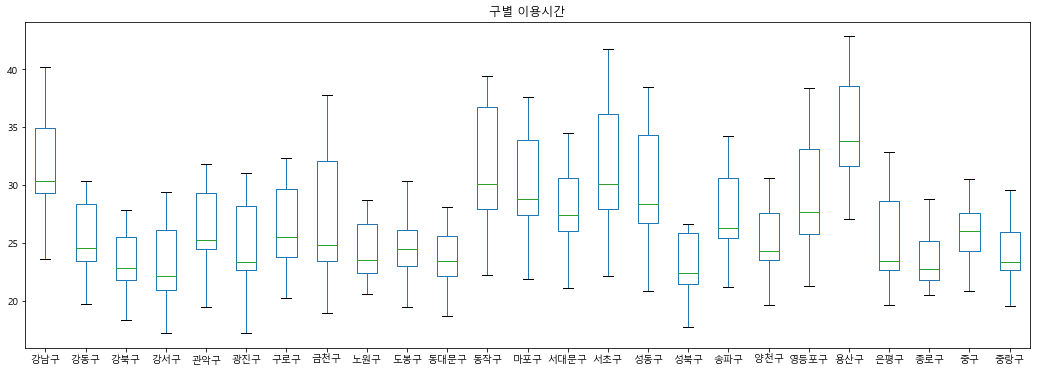

In [67]:
day_gu_time.plot(kind='box', figsize=(18, 6), title='구별 이용시간');

### 2-7-5. 구별 이용거리 평균과 구별 이용시간 평균을 지도에 표시해보기

In [68]:
구별이용거리평균 = bike_ride.groupby('대여구')['이용거리'].mean()
구별이용거리평균

대여구
강남구    4735.45
강동구    3408.61
강북구    3305.03
강서구    3354.75
관악구    4079.91
광진구    3414.36
구로구    4125.86
금천구    4202.14
노원구    3540.14
도봉구    3751.29
동대문구   3457.14
동작구    4760.28
마포구    4260.60
서대문구   4270.13
서초구    4754.26
성동구    4373.95
성북구    3487.54
송파구    3777.27
양천구    3622.09
영등포구   4241.42
용산구    5324.16
은평구    3682.31
종로구    2957.23
중구     3371.09
중랑구    3563.41
Name: 이용거리, dtype: float64

In [69]:
구별이용시간평균 = bike_ride.groupby('대여구')['이용시간'].mean()
구별이용시간평균

대여구
강남구    31.79
강동구    25.39
강북구    23.57
강서구    23.11
관악구    26.47
광진구    24.95
구로구    26.48
금천구    26.50
노원구    24.27
도봉구    24.98
동대문구   23.79
동작구    31.68
마포구    30.65
서대문구   28.25
서초구    32.15
성동구    30.01
성북구    23.20
송파구    27.85
양천구    25.40
영등포구   29.43
용산구    35.29
은평구    25.16
종로구    23.32
중구     25.94
중랑구    24.24
Name: 이용시간, dtype: float64

In [70]:
# json파일 로딩
import json

geo_str = json.load(open('./data/seoul.json', encoding='utf-8'))

In [71]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = 구별이용거리평균,  
    columns = [구별이용거리평균.index, 구별이용거리평균],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [72]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = 구별이용시간평균,  
    columns = [구별이용시간평균.index, 구별이용시간평균],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

분석결과 >

구별 평균이용거리 평균과 구별 평균이용시간 평균은 상당히 비숫한 지도를 보여주고 있다. 상관관계가 높을 것으로 보인다. 멀리가려면 오래 이용해야하니 당연한 결과다.

## 2-8. 유출/유입이 많은 지역

In [73]:
'''
유출비율 = A지역 대여 후 타 지역에 반납한 량 / A지역 총 대여량
유입비율 = 타 지역에서 대여 후 A지역에 반납한 량 / A지역 총 반납량
'''

'\n유출비율 = A지역 대여 후 타 지역에 반납한 량 / A지역 총 대여량\n유입비율 = 타 지역에서 대여 후 A지역에 반납한 량 / A지역 총 반납량\n'

### 2-8-1. 구별유출비를 계산하고 지도에 표시

In [139]:
# 전체 데이터에서 대여구별로 따릉이 이용건수 계산

대여구별총이용 = bike_ride.pivot_table( \
                     index = '대여구', \
                     values = '자전거번호', \
                     aggfunc = 'count')

# 대여구와 반납구가 다른 데이터프레임에서 대여구별로 유출비 계산

대여구별유출 = gu_diff_df.pivot_table( \
                        index = '대여구', \
                        values = '자전거번호', \
                        aggfunc = 'count')

대여구외이용 = 대여구별유출.div(대여구별총이용, axis=1)
대여구내이용 = abs(대여구외이용.sub(1, axis=1))
구별유출 = pd.concat([대여구외이용, 대여구내이용], axis=1)
구별유출.columns = ['유출비', '비유출비']
구별유출.sort_values(by='유출비', ascending=True, inplace=True)

구별유출

유출비  비유출비
대여구            
강서구  0.13  0.87
송파구  0.20  0.80
은평구  0.21  0.79
노원구  0.21  0.79
강동구  0.24  0.76
관악구  0.25  0.75
광진구  0.25  0.75
중랑구  0.28  0.72
영등포구 0.30  0.70
마포구  0.31  0.69
서초구  0.32  0.68
금천구  0.32  0.68
강북구  0.32  0.68
양천구  0.35  0.65
강남구  0.39  0.61
도봉구  0.40  0.60
구로구  0.40  0.60
용산구  0.42  0.58
성북구  0.42  0.58
종로구  0.43  0.57
동대문구 0.44  0.56
성동구  0.45  0.55
동작구  0.51  0.49
서대문구 0.53  0.47
중구   0.61  0.39

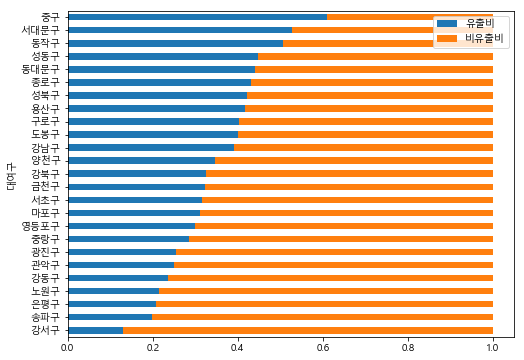

In [121]:
구별유출.plot(kind='barh', stacked=True, figsize=(8, 6));

분석결과 >

전체적으로 비유출비가 휠씬 많고 특히 중구와 서대문구가 유출비가 많다. 반면, 강서구와 송파구는 유출비가 적다.

In [122]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = 구별유출['유출비'],  
    columns = [구별유출['유출비'].index, 구별유출['유출비']],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


분석결과 >

구별유출비만 지도로 표시해보니 중구가 가장 유출이 많은 것이 뚜렷하다. 오피스가 많은 지역이다.

## 2-8-2. 구별유입비를 계산하고 지도에 표시

In [123]:
# 전체 데이터에서 반납구별로 따릉이 이용건수 계산

반납구별총이용 = bike_ride.pivot_table( \
                     index = '반납구', \
                     values = '자전거번호', \
                     aggfunc = 'count')

# 대여구와 반납구가 다른 데이터프레임에서 반납구별로 유입비 계산

반납구별유입 = gu_diff_df.pivot_table( \
                        index = '반납구', \
                        values = '자전거번호', \
                        aggfunc = 'count')

반납구외이용 = 반납구별유입.div(반납구별총이용, axis=1)
반납구내이용 = abs(반납구외이용.sub(1, axis=1))
구별유입 = pd.concat([반납구외이용, 반납구내이용], axis=1)
구별유입.columns = ['유입비', '비유입비']
구별유입.sort_values(by='유입비', ascending=True, inplace=True)

구별유입

유입비  비유입비
반납구            
강서구  0.15  0.85
송파구  0.21  0.79
노원구  0.22  0.78
은평구  0.25  0.75
광진구  0.25  0.75
관악구  0.26  0.74
강동구  0.27  0.73
영등포구 0.29  0.71
서초구  0.31  0.69
마포구  0.31  0.69
금천구  0.32  0.68
중랑구  0.33  0.67
강북구  0.33  0.67
강남구  0.34  0.66
양천구  0.37  0.63
종로구  0.40  0.60
구로구  0.41  0.59
용산구  0.42  0.58
성북구  0.42  0.58
도봉구  0.42  0.58
성동구  0.45  0.55
동대문구 0.45  0.55
서대문구 0.49  0.51
동작구  0.52  0.48
중구   0.59  0.41

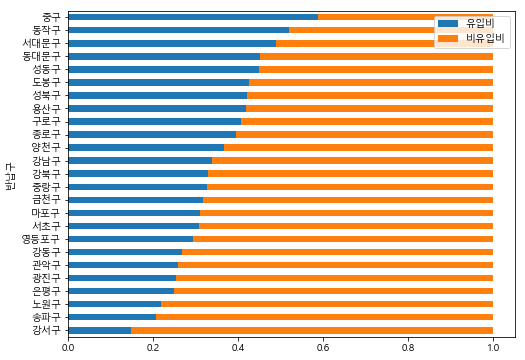

In [124]:
구별유입.plot(kind='barh', stacked=True, figsize=(8, 6));

분석결과 >

중구와 동작구가 유입비가 높고 강서구와 송파구가 유입가 적다.

In [125]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

map.choropleth(
    geo_data = geo_str,
    data = 구별유입['유입비'],  
    columns = [구별유입['유입비'].index, 구별유입['유입비']],
    fill_color = 'YlGnBu',
    key_on = 'feature.properties.name')
   
map

C:\ProgramData\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


분석 결과 >
중랑구와 은평구가 유입기가 높은 것으로 보아 주거단지가 많아 보인다.

## 2-9. 사람들이 주로 출/퇴근하는 지역

### 2-9-1. 대여와 반납이 많이 일어나는 시간대

In [80]:
# 출근시간은 7시~10시, 퇴근시간은 17~20시 사이로 가정한다.

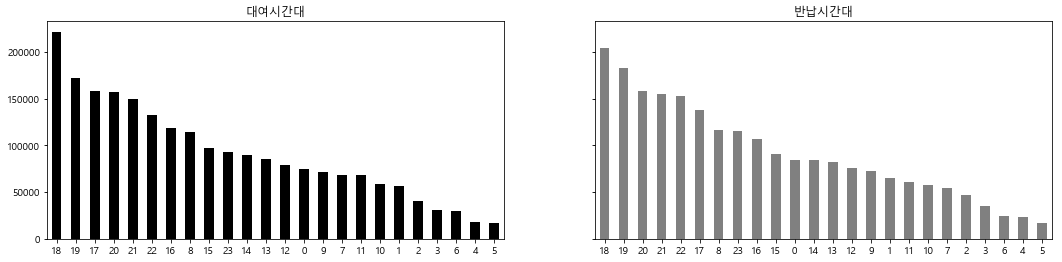

In [81]:
# 대여시간별로 보면 따릉이 이용건수를 본다.
fig, ax = plt.subplots(1, 2, figsize=(18, 4), sharey=True)
bike_ride['대여시간대'].value_counts().plot(kind='bar', title='대여시간대', 
                                       color='black', ax=ax[0], rot=0)

bike_ride['반납시간대'].value_counts().plot(kind='bar', title='반납시간대', 
                                       color='gray', ax=ax[1], rot=0);

분석결과 >

대여시간대는 오후 6시에 가장 많이 대여하고 주로 저녁 시간대에 대여가 많다. 반납시간도 오후 6시에 가장 많이 반납한다.

### 2-9-2. 출근시간대 대여와 반납이 많이 일어나는 구

In [82]:
crit1 = bike_ride['대여시간대'].between(7, 10)
crit2 = bike_ride['반납시간대'].between(7, 10)
to_work_rent = bike_ride[crit1]
to_work_return = bike_ride[crit2]

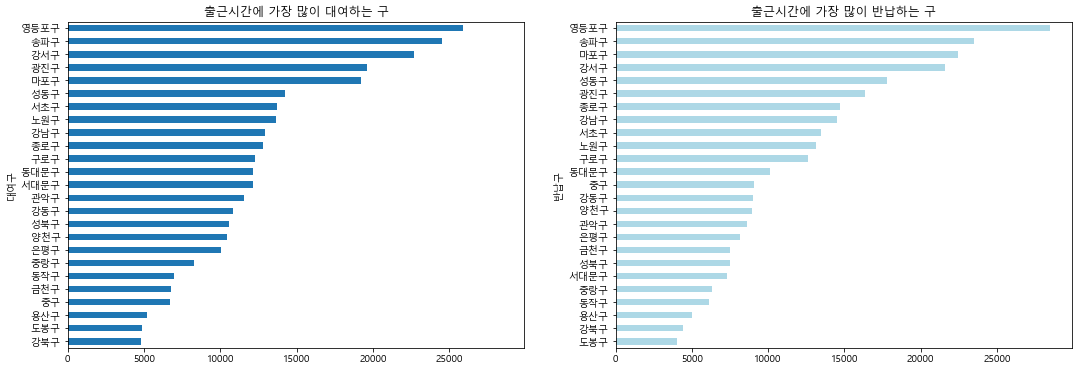

In [83]:
출근대여 = to_work_rent.groupby('대여구')['자전거번호'].count().sort_values()
출근반납 = to_work_return.groupby('반납구')['자전거번호'].count().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
출근대여.plot(kind='barh', title='출근시간에 가장 많이 대여하는 구', ax=ax[0])

출근반납.plot(kind='barh', title='출근시간에 가장 많이 반납하는 구', ax=ax[1], color='lightblue');

분석결과 >

출근시간대 대여는 영등포구, 강서구, 송파구가 가장 이용이 많고, 반납은 영등포구, 송파구, 마포구이다. 출근지역은 영등포구, 송파구, 마포구로 볼 수 있다.

### 2-9-3. 퇴근시간대 대여와 반납이 많이 일어나는 구

In [84]:
crit_a = bike_ride['대여시간대'].between(17, 20)
crit_b = bike_ride['반납시간대'].between(17, 20)
go_home_df_rent = bike_ride[crit_a]
go_home_df_return = bike_ride[crit_b]

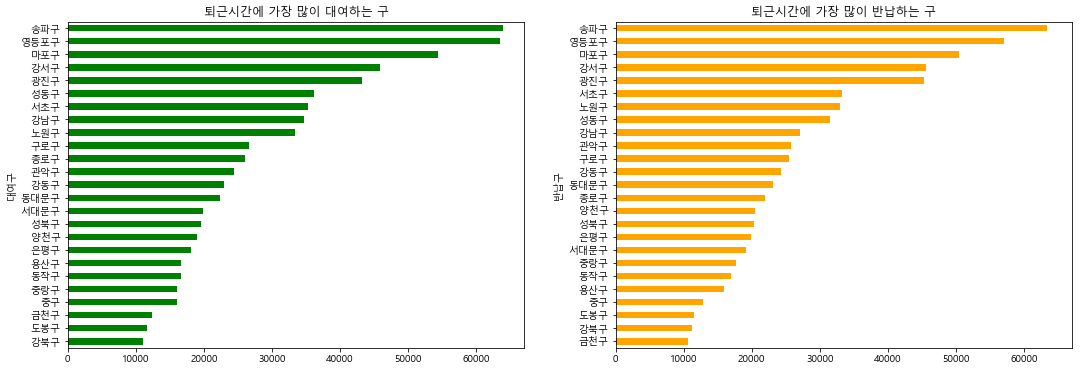

In [85]:
퇴근대여 = go_home_df_rent.groupby('대여구')['자전거번호'].count().sort_values()
퇴근반납 = go_home_df_return.groupby('반납구')['자전거번호'].count().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
퇴근대여.plot(kind='barh', title='퇴근시간에 가장 많이 대여하는 구', ax=ax[0], color='green')
퇴근반납.plot(kind='barh', title='퇴근시간에 가장 많이 반납하는 구', ax=ax[1], color='orange');

분석결과 >

퇴근시간대 대여와 반납은 송파구, 영등포구, 마포구에 많다.

## 2-10. 출/퇴근시간대에 유입/유출이 활발한 지역

### 2-10-1. 출근시간대에 유입/유출이 활발한 지역

In [86]:
cr1 = bike_diff_df['대여시간대'].between(7, 10)
cr2 = bike_diff_df['반납시간대'].between(7, 10)
outflow = bike_diff_df[cr1]
inflow = bike_diff_df[cr2]

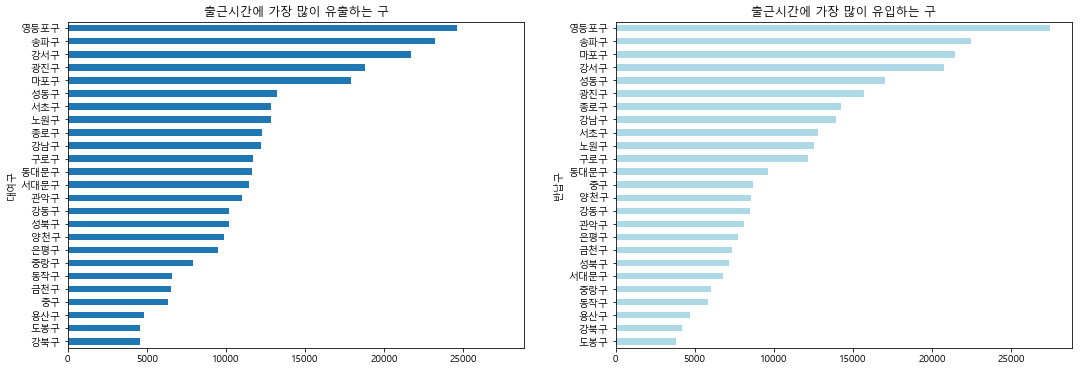

In [87]:
출근유출 = outflow.groupby('대여구')['자전거번호'].count().sort_values()
출근유입 = inflow.groupby('반납구')['자전거번호'].count().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
출근유출.plot(kind='barh', title='출근시간에 가장 많이 유출하는 구', ax=ax[0])
출근유입.plot(kind='barh', title='출근시간에 가장 많이 유입하는 구', ax=ax[1], \
          color='lightblue');

분석결과 >

출근시간대 유출, 유입이 활발한 구는 영등포구, 송파구, 마포구이다. 서대문구는 따릉이 이용이 많은 구인데 출근시간대 유입, 유출은 적다.

### 2-10.2 퇴근시간대에 유입/유출이 활발한 지역

In [88]:
c1 = bike_diff_df['대여시간대'].between(17, 20)
c2 = bike_diff_df['반납시간대'].between(17, 20)
outflow1 = bike_diff_df[c1]
inflow1 = bike_diff_df[c2]

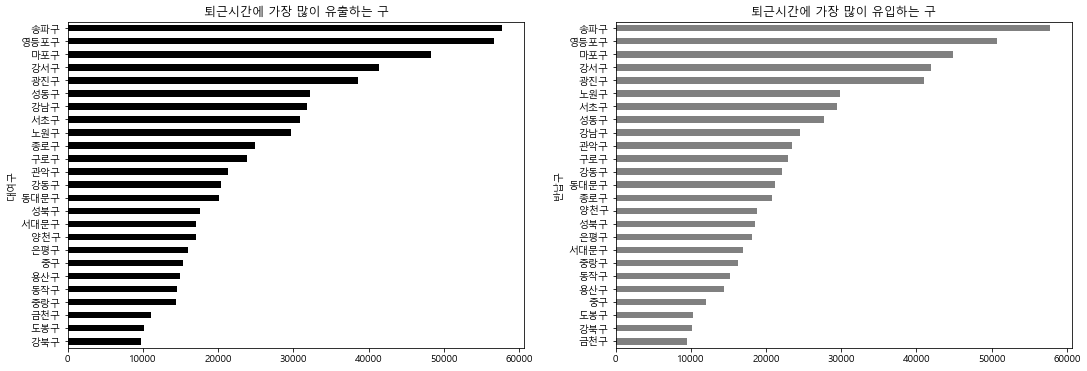

In [89]:
퇴근유출 = outflow1.groupby('대여구')['자전거번호'].count().sort_values()
퇴근유입 = inflow1.groupby('반납구')['자전거번호'].count().sort_values()

fig, ax = plt.subplots(1, 2, figsize=(18, 6), sharex=True)
퇴근유출.plot(kind='barh', title='퇴근시간에 가장 많이 유출하는 구', ax=ax[0], \
         color='black')
퇴근유입.plot(kind='barh', title='퇴근시간에 가장 많이 유입하는 구', ax=ax[1], \
         color='gray');

분석결과 >

퇴근시간대 유출, 유입이 많은 곳은 송파구, 영등포구, 마포구이다. 서대문구는 따릉이 이용량이 많은 지역이나 퇴근시간대 이용이 상대적으로 많지 않다.

## 2-11. 이용거리별 분석

### 2-11-1. 평균이용거리가 긴 상위대여소

In [90]:
long10dist = bike_ride.groupby(['대여 대여소명','대여점위도', '대여점경도'])['이용거리'].mean()\
.reset_index().sort_values(by='이용거리', ascending=False).head(10)
long10dist

대여 대여소명  대여점위도  대여점경도     이용거리
837   석수역1번출구 앞 (SK주유소)  37.44 126.90 10695.90
430     동작역 5번출구 동작주차공원  37.50 126.98  8947.92
1511            황금내근린공원  37.56 126.86  8671.80
402    독산보도육교 앞 자전거 보관소  37.46 126.89  8587.23
1520           흑석역 1번출구  37.51 126.96  8404.72
1446           한남나들목 입구  37.53 127.01  8380.48
1128           옥수역 3번출구  37.54 127.02  8201.50
1456    한신16차아파트 119동 앞  37.52 127.01  7941.09
759         서빙고동 주민센터 앞  37.52 126.99  7922.94
1379         청계천 생태교실 앞  37.57 127.05  7881.99

In [91]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

for index, row in long10dist.iterrows():
    folium.Marker([row['대여점위도'], row['대여점경도']], popup=row['대여 대여소명'], \
                 icon=folium.Icon(color='gray',icon='star')).add_to(map)

map

분석결과 >

한강변에 있거나 공원근처 대여소가 이용거리가 길다.

### 2-11-2. 평균이용거리가 짧은 상위대여소

In [92]:
short10dist = bike_ride.groupby(['대여 대여소명','대여점위도','대여점경도'])['이용거리']\
.mean().reset_index().sort_values(by='이용거리').head(10)
short10dist

대여 대여소명  대여점위도  대여점경도    이용거리
127   건국대학교 과학관(이과대) 앞  37.54 127.08 1631.89
1202   은평뉴타운 상림마을 13단지  37.64 126.93 1743.71
1137      왕십리KCC스위첸아파트  37.56 127.03 1750.16
703          삼일초등학교 인근  37.49 126.97 1798.17
489             마곡역교차로  37.56 126.83 1842.18
1198          은평 지웰테라스  37.64 126.93 1845.23
126        건국대학교 (행정관)  37.54 127.08 1870.21
715          상림마을 생태공원  37.64 126.93 1887.30
236          구파발역 환승센터  37.64 126.92 1887.62
486      마곡역 교차로(2번출구)  37.56 126.83 1915.58

In [93]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

for index, row in short10dist.iterrows():
    folium.Marker([row['대여점위도'], row['대여점경도']], popup=row['대여 대여소명'], \
                 icon=folium.Icon(color='pink',icon='star')).add_to(map)

map

분석결과 >

은평뉴타운 지역이나 건대근처, 김포공항 근처에서 이용거리가 짧은 이용건수가 많다.

### 2-11-3. 주말이용량이 많은 상위대여소 10개의 평균이용거리

In [94]:
rent_weekend_usedist = bike_ride.pivot_table( \
                     index = '대여 대여소명', \
                     columns = '주말구분', \
                     values = '이용거리', \
                     aggfunc = 'mean')
rent_weekend_usedist.columns = ['주말이용거리', '평일이용거리']
주말10이용거리 = rent_weekend_usedist.sort_values(by='주말이용거리', ascending=False)\
['주말이용거리'].head(10)

주말10이용거리

대여 대여소명
석수역1번출구 앞 (SK주유소)   11058.52
독산근린공원 입구            9733.43
도봉산광역환승센터앞           9709.83
황금내근린공원              9262.26
독산주공 14단지 버스정류소      9142.46
한신코아 앞               9140.06
독산보도육교 앞 자전거 보관소     9105.26
한남나들목 입구             8816.35
성지아파트 옆 도로변          8784.39
한신아파트 앞 육교 아래        8681.91
Name: 주말이용거리, dtype: float64

### 2-11-4. 평일이용량이 많은 상위대여소 10개의 평균이용거리

In [95]:
평일10이용거리 = rent_weekend_usedist.sort_values(by='평일이용거리', ascending=False)\
['평일이용거리'].head(10)

평일10이용거리

대여 대여소명
석수역1번출구 앞 (SK주유소)   10496.62
동작역 5번출구 동작주차공원      9166.97
흑석역 1번출구             8402.57
신영동삼거리               8276.32
독산보도육교 앞 자전거 보관소     8257.96
황금내근린공원              8230.28
옥수역 3번출구             8081.57
한남나들목 입구             8076.59
한신16차아파트 119동 앞      7979.82
강일 다솜 어린이 공원         7923.19
Name: 평일이용거리, dtype: float64

## 2-12. 이용시간별 분석

### 2-12-1. 평균이용시간이 많은 상위대여소

In [96]:
long10time = bike_ride.groupby(['대여 대여소명','대여점위도','대여점경도'])['이용시간'].mean()\
.reset_index().sort_values(by='이용시간', ascending=False).head(10)
long10time

대여 대여소명  대여점위도  대여점경도  이용시간
430           동작역 5번출구 동작주차공원  37.50 126.98 60.94
837         석수역1번출구 앞 (SK주유소)  37.44 126.90 57.87
787                 서울숲 관리사무소  37.54 127.04 54.14
1479               현대고등학교 건너편  37.52 127.02 51.87
1065                 여의도중학교 옆  37.52 126.94 51.69
151   고속터미널역 8-1번, 8-2번 출구 사이  37.51 127.00 51.50
788            서울숲 남문 버스정류소 옆  37.54 127.04 50.78
1456          한신16차아파트 119동 앞  37.52 127.01 50.63
1183                    월드컵공원  37.56 126.90 50.20
1446                 한남나들목 입구  37.53 127.01 49.73

In [97]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

for index, row in long10time.iterrows():
    folium.Marker([row['대여점위도'], row['대여점경도']], popup=row['대여 대여소명'], \
                 icon=folium.Icon(color='blue',icon='star')).add_to(map)

map

### 2-12-2. 평균이용시간이 짧은 상위대여소

In [98]:
short10time = bike_ride.groupby(['대여 대여소명','대여점위도','대여점경도'])['이용시간'].mean()\
.reset_index().sort_values(by='이용시간').head(10)
short10time

대여 대여소명  대여점위도  대여점경도  이용시간
1202  은평뉴타운 상림마을 13단지  37.64 126.93  9.71
1137     왕십리KCC스위첸아파트  37.56 127.03 11.43
715         상림마을 생태공원  37.64 126.93 11.52
703         삼일초등학교 인근  37.49 126.97 11.65
7              CJ오쇼핑앞  37.47 126.99 12.91
236         구파발역 환승센터  37.64 126.92 12.98
1198         은평 지웰테라스  37.64 126.93 13.29
489            마곡역교차로  37.56 126.83 13.43
237             국군복지단  37.54 126.98 13.84
811           서울연신중학교  37.62 126.93 14.18

In [99]:
# 서울시의 중심의 위도와 경도 정보를 먼저 입력하고 경계선을 그리자.
# 컬러맵은 구별 따릉이 대여점 수로 지정하자.

# 지도의 중심위치를 정한다.
lat = 주말반납점10['반납점위도'].mean()
lon = 주말반납점10['반납점경도'].mean()
map = folium.Map(location = [lat, lon], zoom_start = 11)

for index, row in short10time.iterrows():
    folium.Marker([row['대여점위도'], row['대여점경도']], popup=row['대여 대여소명'], \
                 icon=folium.Icon(color='red',icon='star')).add_to(map)

map

분석결과 >

이용거리가 긴 상위10개와 이용시간이 긴 상위10개의 위치가 비슷하고, 이용거리가 짧은 상위10개와 이용시간이 짧은 상위10개의 위치가 비슷하가. 이용거리와 이용시간은 상관관계가 높을 것이다.

### 2-12-3. 주말이용량이 많은 상위대여소 10개의 평균이용시간

In [100]:
rent_weekend_usetime = bike_ride.pivot_table( \
                     index = '대여 대여소명', \
                     columns = '주말구분', \
                     values = '이용시간', \
                     aggfunc = 'mean')
rent_weekend_usetime.columns = ['주말이용시간', '평일이용시간']
주말10이용시간 = rent_weekend_usetime.sort_values(by='주말이용시간', ascending=False)\
['주말이용시간'].head(10)

주말10이용시간

대여 대여소명
동작역 5번출구 동작주차공원           65.74
금암 문화공원                   65.30
석수역1번출구 앞 (SK주유소)         62.52
여의나루역 1번출구 앞              57.82
동작역 7번출구                  57.82
고속터미널역 8-1번, 8-2번 출구 사이   57.39
서울숲 관리사무소                 57.00
서울숲 남문 버스정류소 옆            55.65
현대고등학교 건너편                55.07
독산근린공원 입구                 54.99
Name: 주말이용시간, dtype: float64

### 2-12-4. 평일이용량이 많은 상위대여소 10개의 평균이용시간

In [101]:
평일10이용시간 = rent_weekend_usetime.sort_values(by='평일이용시간', ascending=False)\
['평일이용시간'].head(10)

평일10이용시간

대여 대여소명
동작역 5번출구 동작주차공원     57.10
석수역1번출구 앞 (SK주유소)   55.32
서울숲 관리사무소           50.33
여의도중학교 옆            50.33
현대고등학교 건너편          49.32
한신16차아파트 119동 앞     48.72
한남나들목 입구            47.36
한남 유수지 복개주차장        47.20
세곡사거리 대왕파출소 앞       46.82
서울숲 남문 버스정류소 옆      46.65
Name: 평일이용시간, dtype: float64

## 2-13. 같은 곳 또는 다른 곳에서 대여반납이 이루어지는 상위대여소

### 2-13-1. 대여반납이 같은 대여소에서 이루어지는 상위 상위 대여소 20개

In [129]:
same_shop20 = bike_same_df.groupby(['대여 대여소번호', '대여 대여소명'])['자전거번호']\
.count().sort_values(ascending=False).head(20).to_frame()
same_shop20

자전거번호
대여 대여소번호 대여 대여소명                       
502      뚝섬유원지역 1번출구 앞             3371
207      여의나루역 1번출구 앞              2804
3515     서울숲 관리사무소                 1788
152      마포구민체육센터 앞                1714
2219     고속터미널역 8-1번, 8-2번 출구 사이   1617
2102     봉림교 교통섬                   1527
2002     노들역 1번출구                  1205
272      당산육갑문                     1119
565      옥수역 3번출구                  1107
2183     동방1교                      1052
186      월드컵공원                     1052
907      CJ 드림시티                   1032
1160     양천향교역 7번출구앞                994
583      청계천 생태교실 앞                 933
1827     독산보도육교 앞 자전거 보관소           929
2025     흑석역 1번출구                   893
2262     한신16차아파트 119동 앞            886
2301     현대고등학교 건너편                 824
117      홍은사거리                      797
1268     몽촌토성역 1번출구 옆               756

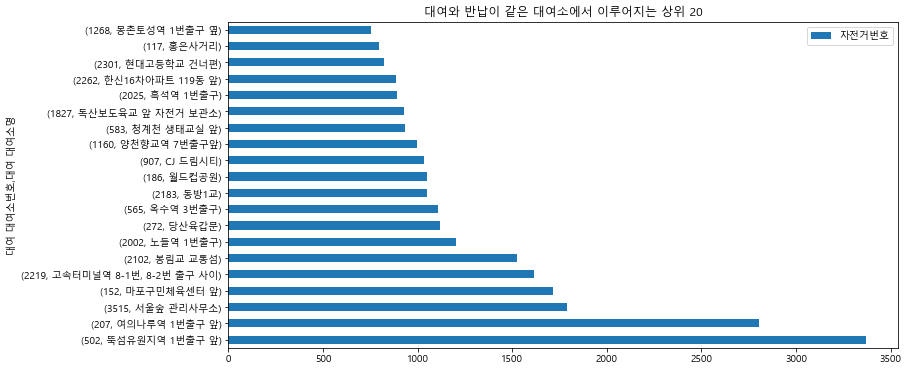

In [131]:
same_shop20.plot(kind='barh', \
                 title='대여와 반납이 같은 대여소에서 이루어지는 상위 20', \
                 figsize=(12, 6));

### 2-13-2. 대여와 반납이 다른 대여소에서 이루어지는 상위 대여소 20

In [132]:
diff_shop20 = bike_diff_df.groupby(['대여 대여소번호', '대여 대여소명'])['자전거번호']\
.count().sort_values(ascending=False).head(20).to_frame()
diff_shop20

자전거번호
대여 대여소번호 대여 대여소명                       
207      여의나루역 1번출구 앞              4630
502      뚝섬유원지역 1번출구 앞             4072
113      홍대입구역 2번출구 앞              3920
2219     고속터미널역 8-1번, 8-2번 출구 사이   3899
1308     안암로터리 버스정류장 앞             3630
1906     신도림역 1번 출구 앞              3452
1911     구로디지털단지역 앞                3255
583      청계천 생태교실 앞                2810
1961     신도림테크노근린공원                2735
2002     노들역 1번출구                  2491
565      옥수역 3번출구                  2478
3541     커먼그라운드                    2329
152      마포구민체육센터 앞                2329
2102     봉림교 교통섬                   2268
2025     흑석역 1번출구                  2174
272      당산육갑문                     2130
568      청계8가사거리 부근                2120
2301     현대고등학교 건너편                2101
2177     신대방역 2번 출구                2067
361      동묘앞역 1번출구 뒤               2054

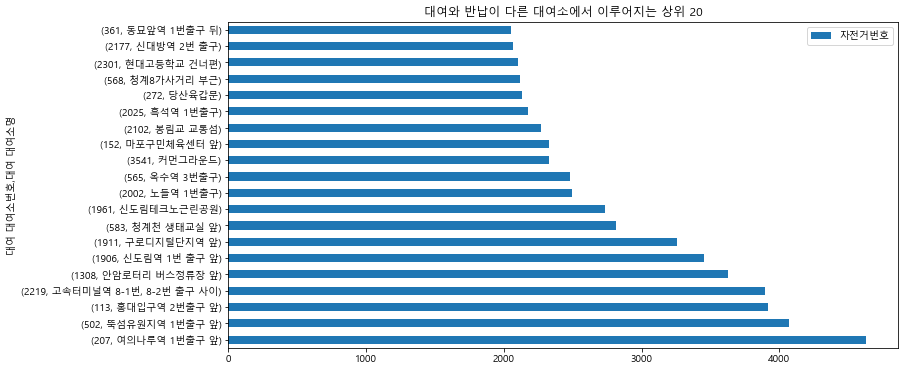

In [133]:
diff_shop20.plot(kind='barh', \
                 title='대여와 반납이 다른 대여소에서 이루어지는 상위 20', \
                 figsize=(12, 6));

### 2-13-3. 위의 그래프 비교

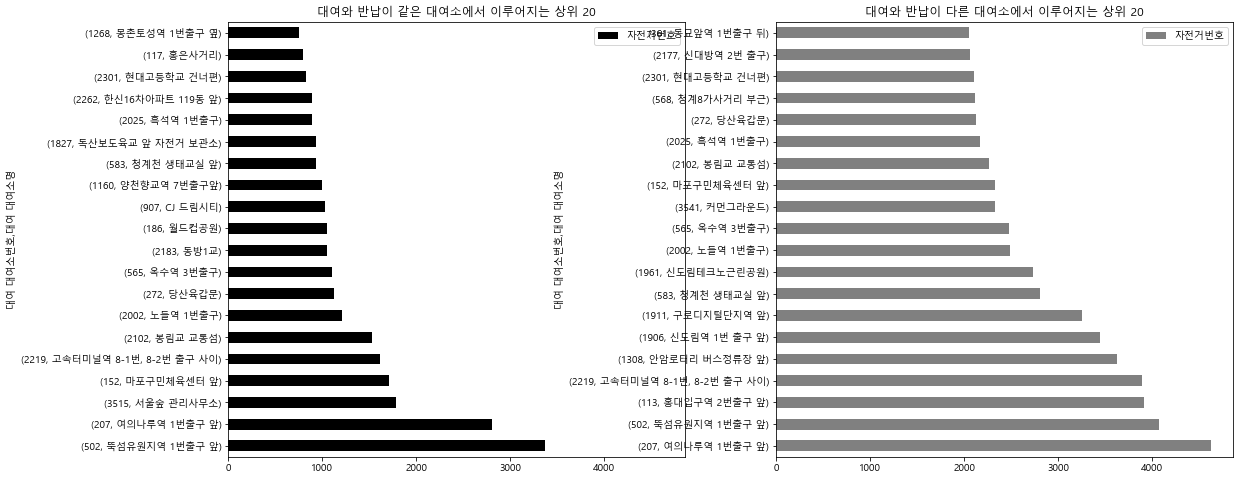

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(18, 8), sharex=True)
same_shop20.plot(kind='barh', \
                 title='대여와 반납이 같은 대여소에서 이루어지는 상위 20', \
                 ax=ax[0], \
                 color='black')
diff_shop20.plot(kind='barh', 
                 title='대여와 반납이 다른 대여소에서 이루어지는 상위 20', \
                 ax=ax[1], \
                 color='gray');